# Imports

In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib

# Data

In [179]:
file_path = '../../강의자료/개발 언어 사용자 분석/Data/survey_results_public.csv'
raw_data = pd.read_csv(file_path)
raw_data

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,"285,000.00000"
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,"250,000.00000"
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,"156,000.00000"
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,"23,456.00000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89179,89180,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Bootstrapping a business;Freelance/contr...,"Associate degree (A.A., A.S., etc.)",Online Courses or Certification;Other online r...,Formal documentation provided by the owner of ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Neither easy nor difficult,NaN
89180,89181,I agree,I am a developer by profession,18-24 years old,"Student, full-time;Employed, part-time","Hybrid (some remote, some in-person)",School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Online Courses or Certification;Othe...,Formal documentation provided by the owner of ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN
89181,89182,I agree,I code primarily as a hobby,Prefer not to say,I prefer not to say,NaN,NaN,Something else,Books / Physical media;Hackathons (virtual or ...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Neither easy nor difficult,NaN
89182,89183,I agree,I am a developer by profession,Under 18 years old,"Employed, part-time;Student, part-time","Hybrid (some remote, some in-person)",Hobby;School or academic work,"Secondary school (e.g. American high school, G...",Online Courses or Certification;Other online r...,Formal documentation provided by the owner of ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,NaN


In [180]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 84 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ResponseId                           89184 non-null  int64  
 1   Q120                                 89184 non-null  object 
 2   MainBranch                           89184 non-null  object 
 3   Age                                  89184 non-null  object 
 4   Employment                           87898 non-null  object 
 5   RemoteWork                           73810 non-null  object 
 6   CodingActivities                     73764 non-null  object 
 7   EdLevel                              87973 non-null  object 
 8   LearnCode                            87663 non-null  object 
 9   LearnCodeOnline                      70084 non-null  object 
 10  LearnCodeCoursesCert                 37076 non-null  object 
 11  YearsCode                   

In [181]:
columns = ['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'EdLevel', 'YearsCodePro', 'DevType', 'Country', 'Currency', 'CompTotal', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'WorkExp', 'Industry']

In [182]:
filtered_raw = raw_data[columns]
filtered_raw

,ResponseId,MainBranch,Age,Employment,RemoteWork,EdLevel,YearsCodePro,DevType,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,WorkExp,Industry
0,1,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9,"Senior Executive (C-Suite, VP, etc.)",United States of America,USD\tUnited States dollar,"285,000.00000",HTML/CSS;JavaScript;Python,Bash/Shell (all shells);C#;Dart;Elixir;GDScrip...,10.00000,"Information Services, IT, Software Development..."
2,3,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23,"Developer, back-end",United States of America,USD\tUnited States dollar,"250,000.00000",Bash/Shell (all shells);Go,Haskell;OCaml;Rust,23.00000,"Information Services, IT, Software Development..."
3,4,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,"Developer, front-end",United States of America,USD\tUnited States dollar,"156,000.00000",Bash/Shell (all shells);HTML/CSS;JavaScript;PH...,Bash/Shell (all shells);HTML/CSS;JavaScript;Ru...,7.00000,NaN
4,5,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,"Developer, full-stack",Philippines,PHP\tPhilippine peso,"1,320,000.00000",HTML/CSS;JavaScript;TypeScript,HTML/CSS;JavaScript;Python;Rust;TypeScript,6.00000,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89179,89180,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,"Associate degree (A.A., A.S., etc.)",5,"Developer, front-end",Brazil,BRL\tBrazilian real,"200,000.00000",HTML/CSS;Java;JavaScript;SQL;TypeScript,Bash/Shell (all shells);C;Go;HTML/CSS;JavaScri...,NaN,NaN
89180,89181,I am a developer by profession,18-24 years old,"Student, full-time;Employed, part-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,"Developer, back-end",Romania,NaN,NaN,Dart;Java;Python;SQL,Java;JavaScript;Python;SQL;TypeScript,NaN,NaN
89181,89182,I code primarily as a hobby,Prefer not to say,I prefer not to say,NaN,Something else,NaN,NaN,Israel,NaN,NaN,Assembly;Bash/Shell (all shells);C;C#;Python;R...,Python;Rust,NaN,NaN
89182,89183,I am a developer by profession,Under 18 years old,"Employed, part-time;Student, part-time","Hybrid (some remote, some in-person)","Secondary school (e.g. American high school, G...",NaN,System administrator,Switzerland,NaN,NaN,Bash/Shell (all shells);C#;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);HTML/CSS;JavaScript;Po...,NaN,NaN


In [183]:
filtered_data = pd.read_csv(file_path, usecols = columns)
filtered_data

,ResponseId,MainBranch,Age,Employment,RemoteWork,EdLevel,YearsCodePro,DevType,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,WorkExp,Industry
0,1,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9,"Senior Executive (C-Suite, VP, etc.)",United States of America,USD\tUnited States dollar,"285,000.00000",HTML/CSS;JavaScript;Python,Bash/Shell (all shells);C#;Dart;Elixir;GDScrip...,10.00000,"Information Services, IT, Software Development..."
2,3,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23,"Developer, back-end",United States of America,USD\tUnited States dollar,"250,000.00000",Bash/Shell (all shells);Go,Haskell;OCaml;Rust,23.00000,"Information Services, IT, Software Development..."
3,4,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,"Developer, front-end",United States of America,USD\tUnited States dollar,"156,000.00000",Bash/Shell (all shells);HTML/CSS;JavaScript;PH...,Bash/Shell (all shells);HTML/CSS;JavaScript;Ru...,7.00000,NaN
4,5,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,"Developer, full-stack",Philippines,PHP\tPhilippine peso,"1,320,000.00000",HTML/CSS;JavaScript;TypeScript,HTML/CSS;JavaScript;Python;Rust;TypeScript,6.00000,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89179,89180,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,"Associate degree (A.A., A.S., etc.)",5,"Developer, front-end",Brazil,BRL\tBrazilian real,"200,000.00000",HTML/CSS;Java;JavaScript;SQL;TypeScript,Bash/Shell (all shells);C;Go;HTML/CSS;JavaScri...,NaN,NaN
89180,89181,I am a developer by profession,18-24 years old,"Student, full-time;Employed, part-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,"Developer, back-end",Romania,NaN,NaN,Dart;Java;Python;SQL,Java;JavaScript;Python;SQL;TypeScript,NaN,NaN
89181,89182,I code primarily as a hobby,Prefer not to say,I prefer not to say,NaN,Something else,NaN,NaN,Israel,NaN,NaN,Assembly;Bash/Shell (all shells);C;C#;Python;R...,Python;Rust,NaN,NaN
89182,89183,I am a developer by profession,Under 18 years old,"Employed, part-time;Student, part-time","Hybrid (some remote, some in-person)","Secondary school (e.g. American high school, G...",NaN,System administrator,Switzerland,NaN,NaN,Bash/Shell (all shells);C#;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);HTML/CSS;JavaScript;Po...,NaN,NaN


# Functions & Variables

In [184]:
standard_figsize = (10, 10)
DATA_DEVS = ['Data or business analyst', 'Data scientist or machine learning specialist', 'Engineer, data']
COMP_KRW = 'CompTotalKrw(만원)'

In [185]:
def get_flattened_list(nested_series):
    split_lists = nested_series.dropna().str.split(';')
    return [val for sublist in split_lists for val in sublist]

def get_unique_values(nested_series):
    flattened_list = get_flattened_list(nested_series)
    unique_values = set(flattened_list)
    return list(unique_values)

def draw_median_salary_barh(df, target, title, ylabel, figsize = standard_figsize):
    plt.figure(figsize = figsize)
    plt.barh(y = df[target], width = df[COMP_KRW])
    plt.xlabel('연봉 중간값 (KRW, 만원)', fontweight = 'bold')
    plt.ylabel(ylabel, fontweight = 'bold')
    plt.title(title, fontsize = 15, fontweight = 'bold')
    plt.xticks(np.arange(0, df[COMP_KRW].values.max() + 1000, 1000), rotation = 45)
    plt.grid(axis = 'x', linestyle = '--', alpha = 0.7)
    plt.show()

def draw_salary_boxplot(df, target, title, ylabel, showfliers = False, figsize = standard_figsize):
    label_values = df[target].dropna().unique()
    plt.figure(figsize = figsize)
    box = plt.boxplot([df[df[target] == value][COMP_KRW] for value in label_values], vert = False, showfliers = showfliers, showmeans = True, meanline = True, labels = label_values, patch_artist = True, boxprops = {'facecolor' : 'teal'})
    plt.setp(box['medians'], color = 'white')
    plt.setp(box['means'], color = 'yellow', linewidth = 1)
    plt.title(title, fontsize = 15, fontweight = 'bold')
    plt.xlabel('연봉 (만원)', fontweight = 'bold')
    plt.ylabel(ylabel, fontweight = 'bold')
    plt.ticklabel_format(style = 'plain', axis = 'x')
    plt.show()

# EDA

In [186]:
df = filtered_raw.copy()
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,EdLevel,YearsCodePro,DevType,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,WorkExp,Industry
0,1,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9,"Senior Executive (C-Suite, VP, etc.)",United States of America,USD\tUnited States dollar,"285,000.00000",HTML/CSS;JavaScript;Python,Bash/Shell (all shells);C#;Dart;Elixir;GDScrip...,10.00000,"Information Services, IT, Software Development..."
2,3,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23,"Developer, back-end",United States of America,USD\tUnited States dollar,"250,000.00000",Bash/Shell (all shells);Go,Haskell;OCaml;Rust,23.00000,"Information Services, IT, Software Development..."
3,4,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,"Developer, front-end",United States of America,USD\tUnited States dollar,"156,000.00000",Bash/Shell (all shells);HTML/CSS;JavaScript;PH...,Bash/Shell (all shells);HTML/CSS;JavaScript;Ru...,7.00000,NaN
4,5,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,"Developer, full-stack",Philippines,PHP\tPhilippine peso,"1,320,000.00000",HTML/CSS;JavaScript;TypeScript,HTML/CSS;JavaScript;Python;Rust;TypeScript,6.00000,Other


In [187]:
df.tail()

,ResponseId,MainBranch,Age,Employment,RemoteWork,EdLevel,YearsCodePro,DevType,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,WorkExp,Industry
89179,89180,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,"Associate degree (A.A., A.S., etc.)",5,"Developer, front-end",Brazil,BRL\tBrazilian real,"200,000.00000",HTML/CSS;Java;JavaScript;SQL;TypeScript,Bash/Shell (all shells);C;Go;HTML/CSS;JavaScri...,NaN,NaN
89180,89181,I am a developer by profession,18-24 years old,"Student, full-time;Employed, part-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,"Developer, back-end",Romania,NaN,NaN,Dart;Java;Python;SQL,Java;JavaScript;Python;SQL;TypeScript,NaN,NaN
89181,89182,I code primarily as a hobby,Prefer not to say,I prefer not to say,NaN,Something else,NaN,NaN,Israel,NaN,NaN,Assembly;Bash/Shell (all shells);C;C#;Python;R...,Python;Rust,NaN,NaN
89182,89183,I am a developer by profession,Under 18 years old,"Employed, part-time;Student, part-time","Hybrid (some remote, some in-person)","Secondary school (e.g. American high school, G...",NaN,System administrator,Switzerland,NaN,NaN,Bash/Shell (all shells);C#;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);HTML/CSS;JavaScript;Po...,NaN,NaN
89183,89184,I am a developer by profession,35-44 years old,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",12,"Developer, full-stack","Iran, Islamic Republic of...",IRR\tIranian rial,"3,300,000,000.00000",C#;Go;JavaScript;SQL;TypeScript,C#;Go;JavaScript;SQL;TypeScript,14.00000,"Information Services, IT, Software Development..."


In [188]:
df = df.drop(index = 0).reset_index(drop = True)
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,EdLevel,YearsCodePro,DevType,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,WorkExp,Industry
0,2,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9,"Senior Executive (C-Suite, VP, etc.)",United States of America,USD\tUnited States dollar,"285,000.00000",HTML/CSS;JavaScript;Python,Bash/Shell (all shells);C#;Dart;Elixir;GDScrip...,10.00000,"Information Services, IT, Software Development..."
1,3,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23,"Developer, back-end",United States of America,USD\tUnited States dollar,"250,000.00000",Bash/Shell (all shells);Go,Haskell;OCaml;Rust,23.00000,"Information Services, IT, Software Development..."
2,4,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,"Developer, front-end",United States of America,USD\tUnited States dollar,"156,000.00000",Bash/Shell (all shells);HTML/CSS;JavaScript;PH...,Bash/Shell (all shells);HTML/CSS;JavaScript;Ru...,7.00000,NaN
3,5,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,"Developer, full-stack",Philippines,PHP\tPhilippine peso,"1,320,000.00000",HTML/CSS;JavaScript;TypeScript,HTML/CSS;JavaScript;Python;Rust;TypeScript,6.00000,Other
4,6,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Some college/university study without earning ...,21,"Developer, back-end",United Kingdom of Great Britain and Northern I...,GBP\tPound sterling,"78,000.00000",Bash/Shell (all shells);HTML/CSS;JavaScript;Ru...,Go;Rust,22.00000,Other


In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89183 entries, 0 to 89182
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ResponseId              89183 non-null  int64  
 1   MainBranch              89183 non-null  object 
 2   Age                     89183 non-null  object 
 3   Employment              87898 non-null  object 
 4   RemoteWork              73810 non-null  object 
 5   EdLevel                 87973 non-null  object 
 6   YearsCodePro            66136 non-null  object 
 7   DevType                 76872 non-null  object 
 8   Country                 87973 non-null  object 
 9   Currency                65334 non-null  object 
 10  CompTotal               48225 non-null  float64
 11  LanguageHaveWorkedWith  87140 non-null  object 
 12  LanguageWantToWorkWith  80709 non-null  object 
 13  WorkExp                 43579 non-null  float64
 14  Industry                36774 non-null

In [190]:
pd.set_option('display.float_format', '{:,.2f}'.format)

In [191]:
df.describe()

,ResponseId,CompTotal,WorkExp
count,"89,183.00","48,225.00","43,579.00"
mean,"44,593.00","1,036,806,635,562,467,391,394,372,602,402,550,2...",11.41
std,"25,745.06","227,684,720,124,393,343,070,593,287,373,462,548...",9.05
min,2.00,0.00,0.00
25%,"22,297.50","63,000.00",5.00
50%,"44,593.00","115,000.00",9.00
75%,"66,888.50","230,000.00",16.00
max,"89,184.00","49,999,999,999,999,992,051,087,350,427,974,655,...",50.00


In [192]:
df.describe(include = object).T

,count,unique,top,freq
MainBranch,89183,6,I am a developer by profession,67237
Age,89183,8,25-34 years old,33247
Employment,87898,106,"Employed, full-time",53748
RemoteWork,73810,3,"Hybrid (some remote, some in-person)",31131
EdLevel,87973,8,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",36706
YearsCodePro,66136,52,5,4792
DevType,76872,33,"Developer, full-stack",25735
Country,87973,185,United States of America,18647
Currency,65334,144,EUR European Euro,17651
LanguageHaveWorkedWith,87140,32641,HTML/CSS;JavaScript;TypeScript,1487


# MainBranch

In [193]:
df['MainBranch'].value_counts()

MainBranch
I am a developer by profession                                                           67237
I am not primarily a developer, but I write code sometimes as part of my work/studies     8954
I am learning to code                                                                     4961
I code primarily as a hobby                                                               4960
I used to be a developer by profession, but no longer am                                  1861
None of these                                                                             1210
Name: count, dtype: int64

In [194]:
PRO_DEV = 'I am a developer by profession'
SEMI_DEV = 'I am not primarily a developer, but I write code sometimes as part of my work/studies'
EX_DEV = 'I used to be a developer by profession, but no longer am'
targetBranch = [PRO_DEV, SEMI_DEV, EX_DEV]

In [195]:
devs_df = df[df['MainBranch'].isin(targetBranch)]
devs_df['MainBranch'].value_counts()
devs_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78052 entries, 0 to 89182
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ResponseId              78052 non-null  int64  
 1   MainBranch              78052 non-null  object 
 2   Age                     78052 non-null  object 
 3   Employment              78013 non-null  object 
 4   RemoteWork              71568 non-null  object 
 5   EdLevel                 78052 non-null  object 
 6   YearsCodePro            66136 non-null  object 
 7   DevType                 73362 non-null  object 
 8   Country                 78052 non-null  object 
 9   Currency                65334 non-null  object 
 10  CompTotal               48225 non-null  float64
 11  LanguageHaveWorkedWith  77556 non-null  object 
 12  LanguageWantToWorkWith  71779 non-null  object 
 13  WorkExp                 43118 non-null  float64
 14  Industry                36393 non-null  obj

# Age

In [196]:
display(df['Age'].value_counts(normalize = True))
display(devs_df['Age'].value_counts(normalize = True))

Age
25-34 years old      0.37
35-44 years old      0.23
18-24 years old      0.20
45-54 years old      0.09
Under 18 years old   0.05
55-64 years old      0.04
65 years or older    0.01
Prefer not to say    0.01
Name: proportion, dtype: float64

Age
25-34 years old      0.41
35-44 years old      0.25
18-24 years old      0.17
45-54 years old      0.10
55-64 years old      0.04
65 years or older    0.01
Under 18 years old   0.01
Prefer not to say    0.00
Name: proportion, dtype: float64

# Employment

In [197]:
devs_df['Employment'].value_counts()

Employment
Employed, full-time                                                                                                     52813
Independent contractor, freelancer, or self-employed                                                                     6758
Employed, full-time;Independent contractor, freelancer, or self-employed                                                 4315
Student, full-time                                                                                                       2972
Not employed, but looking for work                                                                                       1649
                                                                                                                        ...  
Employed, full-time;Student, full-time;Not employed, and not looking for work                                               1
Employed, full-time;Student, full-time;Employed, part-time;Student, part-time;Not employed, and not looking

In [198]:
devs_df['Employment'].hasnans

True

In [199]:
devs_df['Employment'].describe()

count                   78013
unique                    100
top       Employed, full-time
freq                    52813
Name: Employment, dtype: object

In [200]:
flatten_employment_list = get_flattened_list(devs_df['Employment'])

unique_values = get_unique_values(devs_df['Employment'])
unique_values

['Independent contractor, freelancer, or self-employed',
 'Not employed, and not looking for work',
 'Retired',
 'Student, full-time',
 'Employed, part-time',
 'Student, part-time',
 'I prefer not to say',
 'Employed, full-time',
 'Not employed, but looking for work']

In [201]:
pd.Series(flatten_employment_list).value_counts()

Employed, full-time                                     59794
Independent contractor, freelancer, or self-employed    13255
Student, full-time                                       6225
Employed, part-time                                      4497
Not employed, but looking for work                       2628
Student, part-time                                       2549
Not employed, and not looking for work                    553
Retired                                                   513
I prefer not to say                                       233
Name: count, dtype: int64

In [202]:
devs_df = devs_df.dropna(subset = 'Employment')

In [203]:
devs_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78013 entries, 0 to 89182
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ResponseId              78013 non-null  int64  
 1   MainBranch              78013 non-null  object 
 2   Age                     78013 non-null  object 
 3   Employment              78013 non-null  object 
 4   RemoteWork              71568 non-null  object 
 5   EdLevel                 78013 non-null  object 
 6   YearsCodePro            66108 non-null  object 
 7   DevType                 73362 non-null  object 
 8   Country                 78013 non-null  object 
 9   Currency                65298 non-null  object 
 10  CompTotal               48213 non-null  float64
 11  LanguageHaveWorkedWith  77520 non-null  object 
 12  LanguageWantToWorkWith  71750 non-null  object 
 13  WorkExp                 43107 non-null  float64
 14  Industry                36386 non-null  obj

In [204]:
employment_condition1 = devs_df['Employment'].str.contains('Employed, full-time')
employment_condition2 = devs_df['Employment'].str.contains('Independent contractor, freelancer, or self-employed')
employment_condition3 = devs_df['Employment'].str.contains('Employed, part-time')

In [205]:
devs_df = devs_df[employment_condition1|employment_condition2|employment_condition3]

In [206]:
devs_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71582 entries, 0 to 89182
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ResponseId              71582 non-null  int64  
 1   MainBranch              71582 non-null  object 
 2   Age                     71582 non-null  object 
 3   Employment              71582 non-null  object 
 4   RemoteWork              71568 non-null  object 
 5   EdLevel                 71582 non-null  object 
 6   YearsCodePro            65569 non-null  object 
 7   DevType                 71342 non-null  object 
 8   Country                 71582 non-null  object 
 9   Currency                64932 non-null  object 
 10  CompTotal               48126 non-null  float64
 11  LanguageHaveWorkedWith  71186 non-null  object 
 12  LanguageWantToWorkWith  65837 non-null  object 
 13  WorkExp                 43062 non-null  float64
 14  Industry                36349 non-null  obj

# RemoteWork

In [207]:
devs_df['RemoteWork'].value_counts(normalize = True, dropna = False)

RemoteWork
Hybrid (some remote, some in-person)   0.43
Remote                                 0.42
In-person                              0.16
NaN                                    0.00
Name: proportion, dtype: float64

In [208]:
devs_df = devs_df.dropna(subset = 'RemoteWork')
devs_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71568 entries, 0 to 89182
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ResponseId              71568 non-null  int64  
 1   MainBranch              71568 non-null  object 
 2   Age                     71568 non-null  object 
 3   Employment              71568 non-null  object 
 4   RemoteWork              71568 non-null  object 
 5   EdLevel                 71568 non-null  object 
 6   YearsCodePro            65562 non-null  object 
 7   DevType                 71331 non-null  object 
 8   Country                 71568 non-null  object 
 9   Currency                64922 non-null  object 
 10  CompTotal               48126 non-null  float64
 11  LanguageHaveWorkedWith  71173 non-null  object 
 12  LanguageWantToWorkWith  65825 non-null  object 
 13  WorkExp                 43061 non-null  float64
 14  Industry                36349 non-null  obj

# EdLevel

In [209]:
devs_df['EdLevel'].value_counts(dropna = False)

EdLevel
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          32650
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       19050
Some college/university study without earning a degree                                 8835
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     3883
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                                         3510
Associate degree (A.A., A.S., etc.)                                                    2311
Something else                                                                          876
Primary/elementary school                                                               453
Name: count, dtype: int64

# YearsCodePro

In [210]:
devs_df['YearsCodePro'].unique()

array(['9', '23', '7', '4', '21', '3', '15', 'Less than 1 year', '10',
       '2', '6', '14', '5', '19', '13', '16', '28', nan, '1', '30', '11',
       '8', '25', '32', '24', '40', '17', '29', '12', '31', '20', '18',
       '50', '27', '43', '22', '26', '38', '33', '44', '35', '34', '37',
       '42', 'More than 50 years', '47', '36', '39', '41', '48', '45',
       '46', '49'], dtype=object)

In [211]:
devs_df['YearsCodePro'] = devs_df['YearsCodePro'].replace({'Less than 1 year':'0.5', 'More than 50 years':'51'})
devs_df['YearsCodePro'] = pd.to_numeric(devs_df['YearsCodePro']).astype('float')
devs_df['YearsCodePro'].unique()

array([ 9. , 23. ,  7. ,  4. , 21. ,  3. , 15. ,  0.5, 10. ,  2. ,  6. ,
       14. ,  5. , 19. , 13. , 16. , 28. ,  nan,  1. , 30. , 11. ,  8. ,
       25. , 32. , 24. , 40. , 17. , 29. , 12. , 31. , 20. , 18. , 50. ,
       27. , 43. , 22. , 26. , 38. , 33. , 44. , 35. , 34. , 37. , 42. ,
       51. , 47. , 36. , 39. , 41. , 48. , 45. , 46. , 49. ])

In [212]:
devs_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71568 entries, 0 to 89182
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ResponseId              71568 non-null  int64  
 1   MainBranch              71568 non-null  object 
 2   Age                     71568 non-null  object 
 3   Employment              71568 non-null  object 
 4   RemoteWork              71568 non-null  object 
 5   EdLevel                 71568 non-null  object 
 6   YearsCodePro            65562 non-null  float64
 7   DevType                 71331 non-null  object 
 8   Country                 71568 non-null  object 
 9   Currency                64922 non-null  object 
 10  CompTotal               48126 non-null  float64
 11  LanguageHaveWorkedWith  71173 non-null  object 
 12  LanguageWantToWorkWith  65825 non-null  object 
 13  WorkExp                 43061 non-null  float64
 14  Industry                36349 non-null  obj

# DevType

In [213]:
devs_df['DevType'].value_counts()

DevType
Developer, full-stack                            24641
Developer, back-end                              13257
Developer, front-end                              4647
Developer, desktop or enterprise applications     3779
Developer, mobile                                 2457
Other (please specify):                           2423
Engineering manager                               1989
Developer, embedded applications or devices       1799
Data scientist or machine learning specialist     1493
DevOps specialist                                 1346
Research & Development role                       1308
Senior Executive (C-Suite, VP, etc.)              1294
Academic researcher                               1269
Engineer, data                                    1206
Cloud infrastructure engineer                     1009
Developer, game or graphics                        748
Student                                            747
Data or business analyst                           717
Sy

In [214]:
devs_df['DevType'].isna().value_counts()

DevType
False    71331
True       237
Name: count, dtype: int64

In [215]:
devs_df.dropna(subset = 'DevType', inplace = True)
devs_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71331 entries, 0 to 89182
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ResponseId              71331 non-null  int64  
 1   MainBranch              71331 non-null  object 
 2   Age                     71331 non-null  object 
 3   Employment              71331 non-null  object 
 4   RemoteWork              71331 non-null  object 
 5   EdLevel                 71331 non-null  object 
 6   YearsCodePro            65450 non-null  float64
 7   DevType                 71331 non-null  object 
 8   Country                 71331 non-null  object 
 9   Currency                64705 non-null  object 
 10  CompTotal               48089 non-null  float64
 11  LanguageHaveWorkedWith  70970 non-null  object 
 12  LanguageWantToWorkWith  65658 non-null  object 
 13  WorkExp                 42994 non-null  float64
 14  Industry                36329 non-null  obj

# Country

In [216]:
devs_df['Country'].value_counts().head(10)

Country
United States of America                                15590
Germany                                                  6063
United Kingdom of Great Britain and Northern Ireland     4672
India                                                    3931
Canada                                                   2891
France                                                   2477
Netherlands                                              1995
Poland                                                   1983
Brazil                                                   1770
Australia                                                1712
Name: count, dtype: int64

In [217]:
devs_df['Country'].hasnans

False

# Currency & CompTotal

In [218]:
devs_df['Currency'].hasnans

True

In [219]:
devs_df['Currency'].describe()

count                 64705
unique                  142
top       EUR European Euro
freq                  17526
Name: Currency, dtype: object

In [220]:
devs_df['Currency'].value_counts()

Currency
EUR European Euro            17526
USD\tUnited States dollar    16565
GBP\tPound sterling           4435
INR\tIndian rupee             3555
CAD\tCanadian dollar          2626
                             ...  
none\tFaroese krona              1
SDG\tSudanese pound              1
CVE\tCape Verdean escudo         1
BMD\tBermudian dollar            1
SSP\tSouth Sudanese pound        1
Name: count, Length: 142, dtype: int64

In [221]:
devs_df['CompTotal'].describe()

count                                            48,089.00
mean    1,039,738,817,609,016,526,639,937,621,866,932,1...
std     228,006,449,208,023,056,694,661,824,508,407,667...
min                                                   0.00
25%                                              63,000.00
50%                                             115,000.00
75%                                             230,000.00
max     49,999,999,999,999,992,051,087,350,427,974,655,...
Name: CompTotal, dtype: float64

In [222]:
devs_df['Currency'] = devs_df['Currency'].str.slice(start = 0, stop = 3)
devs_df['Currency'].value_counts().head(10)

Currency
EUR    17526
USD    16565
GBP     4435
INR     3555
CAD     2626
PLN     1592
AUD     1573
BRL     1469
SEK     1318
CHF      874
Name: count, dtype: int64

In [223]:
devs_df['Currency'].isin(['KRW']).value_counts()

Currency
False    71147
True       184
Name: count, dtype: int64

In [224]:
import pickle

with open('../../강의자료/개발 언어 사용자 분석/Data/forex.pkl', 'rb') as file:
    forex = pickle.load(file)

display(forex)

{'base': 'KRW',
 'results': {'USD': 0.00077,
  'PHP': 0.04257,
  'GBP': 0.0006,
  'EUR': 0.0007,
  'AUD': 0.00117,
  'SEK': 0.00822,
  'AMD': 0.29761,
  'ZAR': 0.01419,
  'BRL': 0.0037,
  'BDT': 0.08418,
  'CAD': 0.00103,
  'CHF': 0.00068,
  'LKR': 0.24181,
  'INR': 0.06377,
  'IRR': 32.42385,
  'PLN': 0.00313,
  'RUB': 0.07164,
  'DKK': 0.00524,
  'ILS': 0.00283,
  'HUF': 0.27364,
  'SGD': 0.00103,
  'TRY': 0.02084,
  'AED': 0.00284,
  'NOK': 0.00786,
  'RSD': 0.08217,
  'NPR': 0.10195,
  'RON': 0.00347,
  'CNY': 0.00555,
  'SAR': 0.00289,
  'TND': 0.00238,
  'VND': 18.27314,
  'UAH': 0.02832,
  'DOP': 0.04342,
  'EGP': 0.02393,
  'UZS': 8.99345,
  'ISK': 0.10145,
  'BGN': 0.00137,
  'PKR': 0.22192,
  'IDR': 11.7155,
  'GEL': 0.00202,
  'XOF': 0.46154,
  'CZK': 0.01681,
  'BHD': 0.00029,
  'TJS': 0.00844,
  'ARS': 0.21343,
  'COP': 3.09707,
  'BTN': 0.06344,
  'OMR': 0.0003,
  'BAM': 0.00138,
  'MYR': 0.00351,
  'LBP': 11.58596,
  'ALL': 0.07212,
  'NGN': 0.58549,
  'KES': 0.11005,
  

In [225]:
currencies = list(forex['results'].keys())

In [226]:
devs_df_comp = devs_df[devs_df['Currency'].isin(currencies)].copy()
devs_df_comp = devs_df_comp.dropna(subset = ['Currency', 'CompTotal'])
devs_df_comp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47932 entries, 0 to 89182
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ResponseId              47932 non-null  int64  
 1   MainBranch              47932 non-null  object 
 2   Age                     47932 non-null  object 
 3   Employment              47932 non-null  object 
 4   RemoteWork              47932 non-null  object 
 5   EdLevel                 47932 non-null  object 
 6   YearsCodePro            47746 non-null  float64
 7   DevType                 47932 non-null  object 
 8   Country                 47932 non-null  object 
 9   Currency                47932 non-null  object 
 10  CompTotal               47932 non-null  float64
 11  LanguageHaveWorkedWith  47795 non-null  object 
 12  LanguageWantToWorkWith  44474 non-null  object 
 13  WorkExp                 32572 non-null  float64
 14  Industry                27683 non-null  obj

In [227]:
pd.options.display.float_format = '{:,.5f}'.format

In [228]:
devs_df_comp['ExchangeRateToKrw'] = devs_df_comp['Currency'].map(forex['results'])
devs_df_comp.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,EdLevel,YearsCodePro,DevType,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,WorkExp,Industry,ExchangeRateToKrw
0,2,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9.00000,"Senior Executive (C-Suite, VP, etc.)",United States of America,USD,"285,000.00000",HTML/CSS;JavaScript;Python,Bash/Shell (all shells);C#;Dart;Elixir;GDScrip...,10.00000,"Information Services, IT, Software Development...",0.00077
1,3,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23.00000,"Developer, back-end",United States of America,USD,"250,000.00000",Bash/Shell (all shells);Go,Haskell;OCaml;Rust,23.00000,"Information Services, IT, Software Development...",0.00077
2,4,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7.00000,"Developer, front-end",United States of America,USD,"156,000.00000",Bash/Shell (all shells);HTML/CSS;JavaScript;PH...,Bash/Shell (all shells);HTML/CSS;JavaScript;Ru...,7.00000,NaN,0.00077
3,5,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4.00000,"Developer, full-stack",Philippines,PHP,"1,320,000.00000",HTML/CSS;JavaScript;TypeScript,HTML/CSS;JavaScript;Python;Rust;TypeScript,6.00000,Other,0.04257
4,6,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Some college/university study without earning ...,21.00000,"Developer, back-end",United Kingdom of Great Britain and Northern I...,GBP,"78,000.00000",Bash/Shell (all shells);HTML/CSS;JavaScript;Ru...,Go;Rust,22.00000,Other,0.00060


In [229]:
devs_df_comp['CompTotalKrw(만원)'] = devs_df_comp['CompTotal'] / devs_df_comp['ExchangeRateToKrw'] // 10000
devs_df_comp.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,EdLevel,YearsCodePro,DevType,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,WorkExp,Industry,ExchangeRateToKrw,CompTotalKrw(만원)
0,2,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9.00000,"Senior Executive (C-Suite, VP, etc.)",United States of America,USD,"285,000.00000",HTML/CSS;JavaScript;Python,Bash/Shell (all shells);C#;Dart;Elixir;GDScrip...,10.00000,"Information Services, IT, Software Development...",0.00077,"37,012.00000"
1,3,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23.00000,"Developer, back-end",United States of America,USD,"250,000.00000",Bash/Shell (all shells);Go,Haskell;OCaml;Rust,23.00000,"Information Services, IT, Software Development...",0.00077,"32,467.00000"
2,4,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7.00000,"Developer, front-end",United States of America,USD,"156,000.00000",Bash/Shell (all shells);HTML/CSS;JavaScript;PH...,Bash/Shell (all shells);HTML/CSS;JavaScript;Ru...,7.00000,NaN,0.00077,"20,259.00000"
3,5,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4.00000,"Developer, full-stack",Philippines,PHP,"1,320,000.00000",HTML/CSS;JavaScript;TypeScript,HTML/CSS;JavaScript;Python;Rust;TypeScript,6.00000,Other,0.04257,"3,100.00000"
4,6,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Some college/university study without earning ...,21.00000,"Developer, back-end",United Kingdom of Great Britain and Northern I...,GBP,"78,000.00000",Bash/Shell (all shells);HTML/CSS;JavaScript;Ru...,Go;Rust,22.00000,Other,0.00060,"13,000.00000"


In [230]:
devs_df_comp.describe()

,ResponseId,YearsCodePro,CompTotal,WorkExp,ExchangeRateToKrw,CompTotalKrw(만원)
count,"47,932.00000","47,746.00000","47,932.00000","32,572.00000","47,932.00000","47,932.00000"
mean,"42,324.64888",10.75758,"1,043,144,454,644,078,886,719,822,454,619,373,5...",11.44446,0.24695,"36,730,438,543,805,597,531,476,015,637,530,308,..."
std,"24,906.06531",8.66388,"228,379,558,481,497,780,918,514,054,619,301,226...",8.82992,2.34401,"8,041,533,749,348,522,583,841,490,150,116,586,8..."
min,2.00000,0.50000,0.00000,0.00000,0.00024,0.00000
25%,"21,199.75000",4.00000,"63,000.00000",5.00000,0.00070,"5,750.00000"
50%,"40,975.50000",8.00000,"115,000.00000",9.00000,0.00077,"10,000.00000"
75%,"63,667.75000",15.00000,"230,000.00000",16.00000,0.00284,"15,989.50000"
max,"89,184.00000",51.00000,"49,999,999,999,999,992,051,087,350,427,974,655,...",50.00000,32.42385,"1,760,563,380,281,689,785,073,286,269,013,544,8..."


In [231]:
devs_df_comp['CompTotalKrw(만원)'].sort_values(ascending = False).head(20)

56321   1,760,563,380,281,689,785,073,286,269,013,544,8...
18462                          3,084,149,476,388,522.00000
49552                          1,298,701,298,701,298.00000
43555                            288,184,438,040,345.00000
15438                                  4,150,737,563.00000
15396                                    781,973,186.00000
52950                                    679,295,335.00000
32004                                    319,276,439.00000
65902                                     26,083,185.00000
9174                                      21,860,290.00000
50304                                     15,681,354.00000
53267                                      9,708,737.00000
66222                                      9,401,709.00000
19678                                      4,852,606.00000
55101                                      2,254,881.00000
80585                                      1,428,571.00000
83678                                      1,349,206.000

In [232]:
fakeDataId = devs_df_comp[devs_df_comp['CompTotalKrw(만원)'] > 5000000]['ResponseId']

In [233]:
devs_df_comp = devs_df_comp[~devs_df_comp['ResponseId'].isin(fakeDataId)]
devs_df_comp['CompTotalKrw(만원)'].describe()

count      47,919.00000
mean       12,728.94944
std        31,645.45622
min             0.00000
25%         5,750.00000
50%        10,000.00000
75%        15,974.00000
max     4,852,606.00000
Name: CompTotalKrw(만원), dtype: float64

In [234]:
zeroCompId = devs_df_comp[devs_df_comp['CompTotalKrw(만원)'] == 0]['ResponseId']

In [235]:
devs_df_comp = devs_df_comp[~devs_df_comp['ResponseId'].isin(zeroCompId)]
devs_df_comp['CompTotalKrw(만원)'].describe()

count      47,685.00000
mean       12,791.41298
std        31,710.41207
min             1.00000
25%         5,833.00000
50%        10,000.00000
75%        16,083.00000
max     4,852,606.00000
Name: CompTotalKrw(만원), dtype: float64

In [236]:
devs_df = devs_df[~devs_df['ResponseId'].isin(fakeDataId)]
devs_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71318 entries, 0 to 89182
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ResponseId              71318 non-null  int64  
 1   MainBranch              71318 non-null  object 
 2   Age                     71318 non-null  object 
 3   Employment              71318 non-null  object 
 4   RemoteWork              71318 non-null  object 
 5   EdLevel                 71318 non-null  object 
 6   YearsCodePro            65438 non-null  float64
 7   DevType                 71318 non-null  object 
 8   Country                 71318 non-null  object 
 9   Currency                64692 non-null  object 
 10  CompTotal               48076 non-null  float64
 11  LanguageHaveWorkedWith  70957 non-null  object 
 12  LanguageWantToWorkWith  65649 non-null  object 
 13  WorkExp                 42985 non-null  float64
 14  Industry                36327 non-null  obj

# Language

In [237]:
devs_df['LanguageHaveWorkedWith'].value_counts()

LanguageHaveWorkedWith
HTML/CSS;JavaScript;TypeScript                                                                                                       1308
Python                                                                                                                                765
HTML/CSS;JavaScript;PHP;SQL                                                                                                           639
C#                                                                                                                                    572
C#;HTML/CSS;JavaScript;SQL;TypeScript                                                                                                 555
                                                                                                                                     ... 
Bash/Shell (all shells);C#;C++;Go;HTML/CSS;JavaScript;Python;SQL                                                                        1
Bash/Shell 

In [238]:
flattened_lang_list = get_flattened_list(devs_df['LanguageHaveWorkedWith'])
language_sr = pd.Series(flattened_lang_list)
language_sr.value_counts(normalize = True)

JavaScript                0.12192
HTML/CSS                  0.09821
SQL                       0.09799
Python                    0.08838
TypeScript                0.07822
Bash/Shell (all shells)   0.06306
Java                      0.05572
C#                        0.05417
C++                       0.03712
PHP                       0.03623
C                         0.03079
PowerShell                0.02682
Go                        0.02674
Rust                      0.02212
Kotlin                    0.01742
Ruby                      0.01289
Dart                      0.01082
Lua                       0.00960
Swift                     0.00918
Assembly                  0.00803
Visual Basic (.Net)       0.00782
R                         0.00756
Groovy                    0.00749
VBA                       0.00695
Delphi                    0.00666
MATLAB                    0.00633
Scala                     0.00587
Perl                      0.00502
Objective-C               0.00483
Elixir        

In [239]:
flattened_prf_lang_list = get_flattened_list(devs_df['LanguageWantToWorkWith'])
language_prf_sr = pd.Series(flattened_prf_lang_list)
language_prf_sr.value_counts(normalize = True)

JavaScript                0.09609
Python                    0.09154
TypeScript                0.09105
SQL                       0.08539
HTML/CSS                  0.08045
Rust                      0.07143
C#                        0.05212
Go                        0.05119
Bash/Shell (all shells)   0.05048
Java                      0.03757
C++                       0.03217
Kotlin                    0.02823
C                         0.02190
PHP                       0.02183
PowerShell                0.01717
Dart                      0.01550
Swift                     0.01480
Ruby                      0.01188
Elixir                    0.01112
Lua                       0.00920
Zig                       0.00885
Scala                     0.00811
Haskell                   0.00783
R                         0.00779
Assembly                  0.00736
F#                        0.00603
Delphi                    0.00572
Julia                     0.00539
Clojure                   0.00523
Solidity      

In [240]:
devs_lang_df = devs_df.copy()
devs_lang_df['LanguageHaveWorkedWith'] = devs_lang_df['LanguageHaveWorkedWith'].str.split(';')
devs_lang_df = devs_lang_df.explode('LanguageHaveWorkedWith')
devs_lang_df['LanguageHaveWorkedWith'].value_counts()

LanguageHaveWorkedWith
JavaScript                 45506
HTML/CSS                   36658
SQL                        36575
Python                     32989
TypeScript                 29195
Bash/Shell (all shells)    23537
Java                       20797
C#                         20217
C++                        13855
PHP                        13522
C                          11492
PowerShell                 10012
Go                          9981
Rust                        8255
Kotlin                      6501
Ruby                        4810
Dart                        4040
Lua                         3583
Swift                       3425
Assembly                    2996
Visual Basic (.Net)         2918
R                           2822
Groovy                      2796
VBA                         2594
Delphi                      2486
MATLAB                      2363
Scala                       2192
Perl                        1872
Objective-C                 1802
Elixir              

In [241]:
devs_lang_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 373607 entries, 0 to 89182
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ResponseId              373607 non-null  int64  
 1   MainBranch              373607 non-null  object 
 2   Age                     373607 non-null  object 
 3   Employment              373607 non-null  object 
 4   RemoteWork              373607 non-null  object 
 5   EdLevel                 373607 non-null  object 
 6   YearsCodePro            334729 non-null  float64
 7   DevType                 373607 non-null  object 
 8   Country                 373607 non-null  object 
 9   Currency                330374 non-null  object 
 10  CompTotal               247070 non-null  float64
 11  LanguageHaveWorkedWith  373246 non-null  object 
 12  LanguageWantToWorkWith  345947 non-null  object 
 13  WorkExp                 226974 non-null  float64
 14  Industry                19

In [242]:
devs_lang_df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,EdLevel,YearsCodePro,DevType,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,WorkExp,Industry
0,2,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9.00000,"Senior Executive (C-Suite, VP, etc.)",United States of America,USD,"285,000.00000",HTML/CSS,Bash/Shell (all shells);C#;Dart;Elixir;GDScrip...,10.00000,"Information Services, IT, Software Development..."
0,2,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9.00000,"Senior Executive (C-Suite, VP, etc.)",United States of America,USD,"285,000.00000",JavaScript,Bash/Shell (all shells);C#;Dart;Elixir;GDScrip...,10.00000,"Information Services, IT, Software Development..."
0,2,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9.00000,"Senior Executive (C-Suite, VP, etc.)",United States of America,USD,"285,000.00000",Python,Bash/Shell (all shells);C#;Dart;Elixir;GDScrip...,10.00000,"Information Services, IT, Software Development..."
1,3,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23.00000,"Developer, back-end",United States of America,USD,"250,000.00000",Bash/Shell (all shells),Haskell;OCaml;Rust,23.00000,"Information Services, IT, Software Development..."
1,3,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23.00000,"Developer, back-end",United States of America,USD,"250,000.00000",Go,Haskell;OCaml;Rust,23.00000,"Information Services, IT, Software Development..."


In [243]:
lang_by_devtype = devs_lang_df.groupby(['DevType', 'LanguageHaveWorkedWith'])['ResponseId'].count().reset_index(name = 'Count')
lang_by_devtype.head()

,DevType,LanguageHaveWorkedWith,Count
0,Academic researcher,APL,8
1,Academic researcher,Ada,26
2,Academic researcher,Apex,5
3,Academic researcher,Assembly,118
4,Academic researcher,Bash/Shell (all shells),524


In [244]:
lang_by_devtype.sort_values(by = 'Count', ascending = False)
lang_by_devtype['DevType'].unique()

array(['Academic researcher', 'Blockchain',
       'Cloud infrastructure engineer', 'Data or business analyst',
       'Data scientist or machine learning specialist',
       'Database administrator', 'Designer', 'DevOps specialist',
       'Developer Advocate', 'Developer Experience',
       'Developer, QA or test', 'Developer, back-end',
       'Developer, desktop or enterprise applications',
       'Developer, embedded applications or devices',
       'Developer, front-end', 'Developer, full-stack',
       'Developer, game or graphics', 'Developer, mobile', 'Educator',
       'Engineer, data', 'Engineer, site reliability',
       'Engineering manager', 'Hardware Engineer',
       'Marketing or sales professional', 'Other (please specify):',
       'Product manager', 'Project manager',
       'Research & Development role', 'Scientist',
       'Security professional', 'Senior Executive (C-Suite, VP, etc.)',
       'Student', 'System administrator'], dtype=object)

In [245]:
lang_by_data_devs = lang_by_devtype[lang_by_devtype['DevType'].isin(DATA_DEVS)].copy()
lang_by_data_devs.sort_values(by = ['DevType', 'Count'], ascending = False)

,DevType,LanguageHaveWorkedWith,Count
986,"Engineer, data",Python,1039
992,"Engineer, data",SQL,879
953,"Engineer, data",Bash/Shell (all shells),531
973,"Engineer, data",JavaScript,435
970,"Engineer, data",HTML/CSS,340
...,...,...,...
181,Data or business analyst,Nim,3
182,Data or business analyst,OCaml,2
200,Data or business analyst,Zig,2
153,Data or business analyst,APL,1


In [246]:
for dev in DATA_DEVS:
    top5_lang = lang_by_data_devs[lang_by_data_devs['DevType'] == dev].sort_values(by = 'Count', ascending = False)[:5]
    display(top5_lang)

,DevType,LanguageHaveWorkedWith,Count
193,Data or business analyst,SQL,535
188,Data or business analyst,Python,485
175,Data or business analyst,JavaScript,299
172,Data or business analyst,HTML/CSS,295
189,Data or business analyst,R,194


,DevType,LanguageHaveWorkedWith,Count
237,Data scientist or machine learning specialist,Python,1398
243,Data scientist or machine learning specialist,SQL,834
205,Data scientist or machine learning specialist,Bash/Shell (all shells),537
224,Data scientist or machine learning specialist,JavaScript,464
238,Data scientist or machine learning specialist,R,428


,DevType,LanguageHaveWorkedWith,Count
986,"Engineer, data",Python,1039
992,"Engineer, data",SQL,879
953,"Engineer, data",Bash/Shell (all shells),531
973,"Engineer, data",JavaScript,435
970,"Engineer, data",HTML/CSS,340


In [247]:
devs_prflang_df = devs_df.copy()
devs_prflang_df['LanguageWantToWorkWith'] = devs_prflang_df['LanguageWantToWorkWith'].str.split(';')
devs_prflang_df = devs_prflang_df.explode('LanguageWantToWorkWith')
devs_prflang_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 298210 entries, 0 to 89182
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ResponseId              298210 non-null  int64  
 1   MainBranch              298210 non-null  object 
 2   Age                     298210 non-null  object 
 3   Employment              298210 non-null  object 
 4   RemoteWork              298210 non-null  object 
 5   EdLevel                 298210 non-null  object 
 6   YearsCodePro            266989 non-null  float64
 7   DevType                 298210 non-null  object 
 8   Country                 298210 non-null  object 
 9   Currency                263956 non-null  object 
 10  CompTotal               198571 non-null  float64
 11  LanguageHaveWorkedWith  297849 non-null  object 
 12  LanguageWantToWorkWith  292541 non-null  object 
 13  WorkExp                 187024 non-null  float64
 14  Industry                15

# WorkExp

In [248]:
devs_df['WorkExp'].value_counts(dropna = False, normalize = True)

WorkExp
NaN        0.39728
5.00000    0.04572
10.00000   0.04187
2.00000    0.03835
3.00000    0.03827
4.00000    0.03500
7.00000    0.03379
6.00000    0.03233
8.00000    0.03103
1.00000    0.03054
15.00000   0.02769
12.00000   0.02394
20.00000   0.02222
9.00000    0.01988
11.00000   0.01834
25.00000   0.01666
13.00000   0.01628
16.00000   0.01217
17.00000   0.01192
14.00000   0.01185
18.00000   0.01075
23.00000   0.01017
30.00000   0.00864
22.00000   0.00747
24.00000   0.00572
19.00000   0.00529
21.00000   0.00522
26.00000   0.00464
27.00000   0.00411
35.00000   0.00404
28.00000   0.00369
0.00000    0.00315
40.00000   0.00245
33.00000   0.00234
32.00000   0.00226
31.00000   0.00182
29.00000   0.00178
36.00000   0.00174
34.00000   0.00149
37.00000   0.00129
38.00000   0.00119
50.00000   0.00095
41.00000   0.00094
45.00000   0.00073
42.00000   0.00062
39.00000   0.00060
43.00000   0.00057
44.00000   0.00038
46.00000   0.00036
47.00000   0.00024
48.00000   0.00017
49.00000   0.00006
Name

In [249]:
devs_df['WorkExp'].describe()

count   42,985.00000
mean        11.43508
std          9.02923
min          0.00000
25%          5.00000
50%          9.00000
75%         16.00000
max         50.00000
Name: WorkExp, dtype: float64

# Industry

In [250]:
devs_df['Industry'].value_counts(dropna = False, normalize = True)

Industry
NaN                                                                   0.49063
Information Services, IT, Software Development, or other Technology   0.25221
Financial Services                                                    0.06165
Other                                                                 0.05533
Manufacturing, Transportation, or Supply Chain                        0.03580
Healthcare                                                            0.03060
Retail and Consumer Services                                          0.02696
Higher Education                                                      0.01704
Advertising Services                                                  0.01084
Insurance                                                             0.00983
Oil & Gas                                                             0.00372
Legal Services                                                        0.00287
Wholesale                                              

# Checkpoint - Save Data

In [251]:
devs_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71318 entries, 0 to 89182
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ResponseId              71318 non-null  int64  
 1   MainBranch              71318 non-null  object 
 2   Age                     71318 non-null  object 
 3   Employment              71318 non-null  object 
 4   RemoteWork              71318 non-null  object 
 5   EdLevel                 71318 non-null  object 
 6   YearsCodePro            65438 non-null  float64
 7   DevType                 71318 non-null  object 
 8   Country                 71318 non-null  object 
 9   Currency                64692 non-null  object 
 10  CompTotal               48076 non-null  float64
 11  LanguageHaveWorkedWith  70957 non-null  object 
 12  LanguageWantToWorkWith  65649 non-null  object 
 13  WorkExp                 42985 non-null  float64
 14  Industry                36327 non-null  obj

In [252]:
devs_df_comp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47685 entries, 0 to 89182
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ResponseId              47685 non-null  int64  
 1   MainBranch              47685 non-null  object 
 2   Age                     47685 non-null  object 
 3   Employment              47685 non-null  object 
 4   RemoteWork              47685 non-null  object 
 5   EdLevel                 47685 non-null  object 
 6   YearsCodePro            47505 non-null  float64
 7   DevType                 47685 non-null  object 
 8   Country                 47685 non-null  object 
 9   Currency                47685 non-null  object 
 10  CompTotal               47685 non-null  float64
 11  LanguageHaveWorkedWith  47556 non-null  object 
 12  LanguageWantToWorkWith  44264 non-null  object 
 13  WorkExp                 32446 non-null  float64
 14  Industry                27584 non-null  obj

In [253]:
devs_lang_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 373607 entries, 0 to 89182
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ResponseId              373607 non-null  int64  
 1   MainBranch              373607 non-null  object 
 2   Age                     373607 non-null  object 
 3   Employment              373607 non-null  object 
 4   RemoteWork              373607 non-null  object 
 5   EdLevel                 373607 non-null  object 
 6   YearsCodePro            334729 non-null  float64
 7   DevType                 373607 non-null  object 
 8   Country                 373607 non-null  object 
 9   Currency                330374 non-null  object 
 10  CompTotal               247070 non-null  float64
 11  LanguageHaveWorkedWith  373246 non-null  object 
 12  LanguageWantToWorkWith  345947 non-null  object 
 13  WorkExp                 226974 non-null  float64
 14  Industry                19

In [254]:
devs_prflang_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 298210 entries, 0 to 89182
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ResponseId              298210 non-null  int64  
 1   MainBranch              298210 non-null  object 
 2   Age                     298210 non-null  object 
 3   Employment              298210 non-null  object 
 4   RemoteWork              298210 non-null  object 
 5   EdLevel                 298210 non-null  object 
 6   YearsCodePro            266989 non-null  float64
 7   DevType                 298210 non-null  object 
 8   Country                 298210 non-null  object 
 9   Currency                263956 non-null  object 
 10  CompTotal               198571 non-null  float64
 11  LanguageHaveWorkedWith  297849 non-null  object 
 12  LanguageWantToWorkWith  292541 non-null  object 
 13  WorkExp                 187024 non-null  float64
 14  Industry                15

In [255]:
devs_df.to_csv('../../강의자료/개발 언어 사용자 분석/Data/preprocessed_survey_full.csv', index = False)
devs_df_comp.to_csv('../../강의자료/개발 언어 사용자 분석/Data/preprocessed_survey_comp.csv', index = False)
devs_lang_df.to_csv('../../강의자료/개발 언어 사용자 분석/Data/preprocessed_lang_exploded.csv', index = False)
devs_prflang_df.to_csv('../../강의자료/개발 언어 사용자 분석/Data/preprocessed_prflang_exploded.csv', index = False)

# Reload Data

In [256]:
full_df = pd.read_csv('../../강의자료/개발 언어 사용자 분석/Data/preprocessed_survey_full.csv')
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71318 entries, 0 to 71317
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ResponseId              71318 non-null  int64  
 1   MainBranch              71318 non-null  object 
 2   Age                     71318 non-null  object 
 3   Employment              71318 non-null  object 
 4   RemoteWork              71318 non-null  object 
 5   EdLevel                 71318 non-null  object 
 6   YearsCodePro            65438 non-null  float64
 7   DevType                 71318 non-null  object 
 8   Country                 71318 non-null  object 
 9   Currency                64692 non-null  object 
 10  CompTotal               48076 non-null  float64
 11  LanguageHaveWorkedWith  70957 non-null  object 
 12  LanguageWantToWorkWith  65649 non-null  object 
 13  WorkExp                 42985 non-null  float64
 14  Industry                36327 non-null

In [257]:
comp_df = pd.read_csv('../../강의자료/개발 언어 사용자 분석/Data/preprocessed_survey_comp.csv')
comp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47685 entries, 0 to 47684
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ResponseId              47685 non-null  int64  
 1   MainBranch              47685 non-null  object 
 2   Age                     47685 non-null  object 
 3   Employment              47685 non-null  object 
 4   RemoteWork              47685 non-null  object 
 5   EdLevel                 47685 non-null  object 
 6   YearsCodePro            47505 non-null  float64
 7   DevType                 47685 non-null  object 
 8   Country                 47685 non-null  object 
 9   Currency                47685 non-null  object 
 10  CompTotal               47685 non-null  float64
 11  LanguageHaveWorkedWith  47556 non-null  object 
 12  LanguageWantToWorkWith  44264 non-null  object 
 13  WorkExp                 32446 non-null  float64
 14  Industry                27584 non-null

In [258]:
lang_df = pd.read_csv('../../강의자료/개발 언어 사용자 분석/Data/preprocessed_lang_exploded.csv')
lang_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373607 entries, 0 to 373606
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ResponseId              373607 non-null  int64  
 1   MainBranch              373607 non-null  object 
 2   Age                     373607 non-null  object 
 3   Employment              373607 non-null  object 
 4   RemoteWork              373607 non-null  object 
 5   EdLevel                 373607 non-null  object 
 6   YearsCodePro            334729 non-null  float64
 7   DevType                 373607 non-null  object 
 8   Country                 373607 non-null  object 
 9   Currency                330374 non-null  object 
 10  CompTotal               247070 non-null  float64
 11  LanguageHaveWorkedWith  373246 non-null  object 
 12  LanguageWantToWorkWith  345947 non-null  object 
 13  WorkExp                 226974 non-null  float64
 14  Industry            

In [259]:
prflang_df = pd.read_csv('../../강의자료/개발 언어 사용자 분석/Data/preprocessed_prflang_exploded.csv')
prflang_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298210 entries, 0 to 298209
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ResponseId              298210 non-null  int64  
 1   MainBranch              298210 non-null  object 
 2   Age                     298210 non-null  object 
 3   Employment              298210 non-null  object 
 4   RemoteWork              298210 non-null  object 
 5   EdLevel                 298210 non-null  object 
 6   YearsCodePro            266989 non-null  float64
 7   DevType                 298210 non-null  object 
 8   Country                 298210 non-null  object 
 9   Currency                263956 non-null  object 
 10  CompTotal               198571 non-null  float64
 11  LanguageHaveWorkedWith  297849 non-null  object 
 12  LanguageWantToWorkWith  292541 non-null  object 
 13  WorkExp                 187024 non-null  float64
 14  Industry            

# Visualization

## 인기있는 언어

### 현재 사용하는 언어

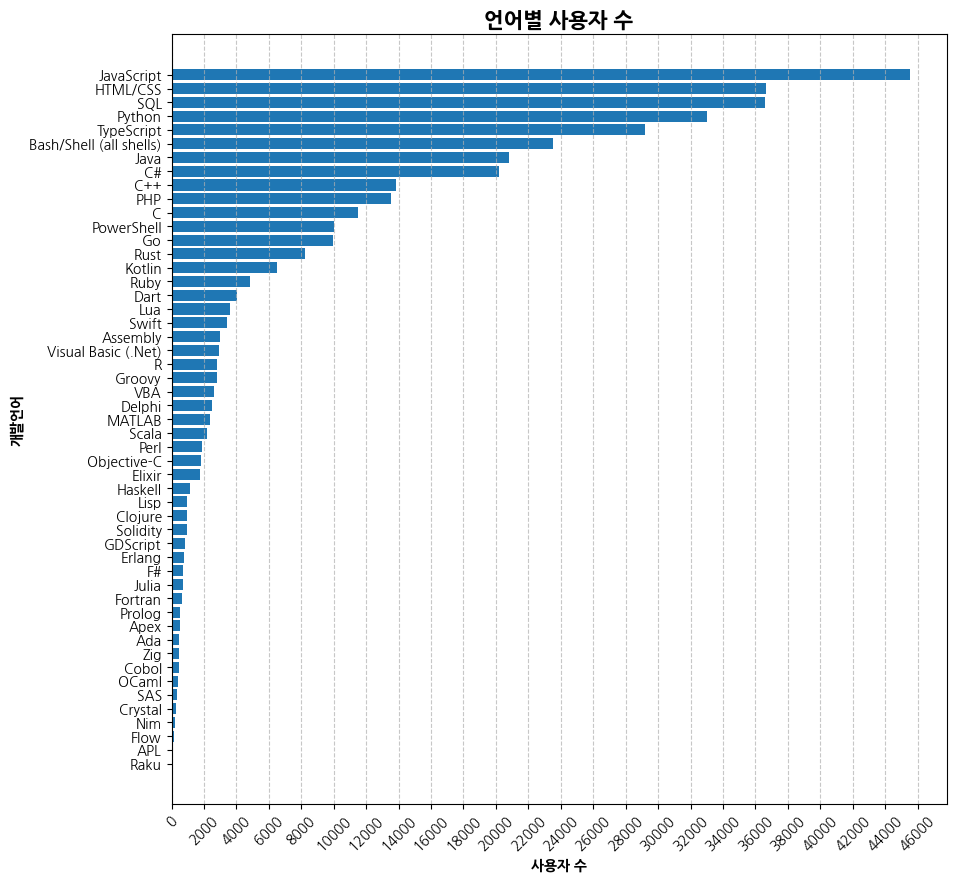

In [260]:
lang_frequency = lang_df['LanguageHaveWorkedWith'].value_counts(ascending = True)

plt.figure(figsize = standard_figsize)

plt.barh(width = lang_frequency.values, y = lang_frequency.index)
plt.title('언어별 사용자 수', fontsize = 15, fontweight = 'bold')
plt.xlabel('사용자 수', fontweight = 'bold')
plt.ylabel('개발언어', fontweight = 'bold')
plt.xticks(np.arange(0, lang_frequency.values.max() + 2000, 2000), rotation = 45)
plt.grid(axis = 'x', linestyle = '--', alpha = 0.7)
plt.show()

#### Top 10

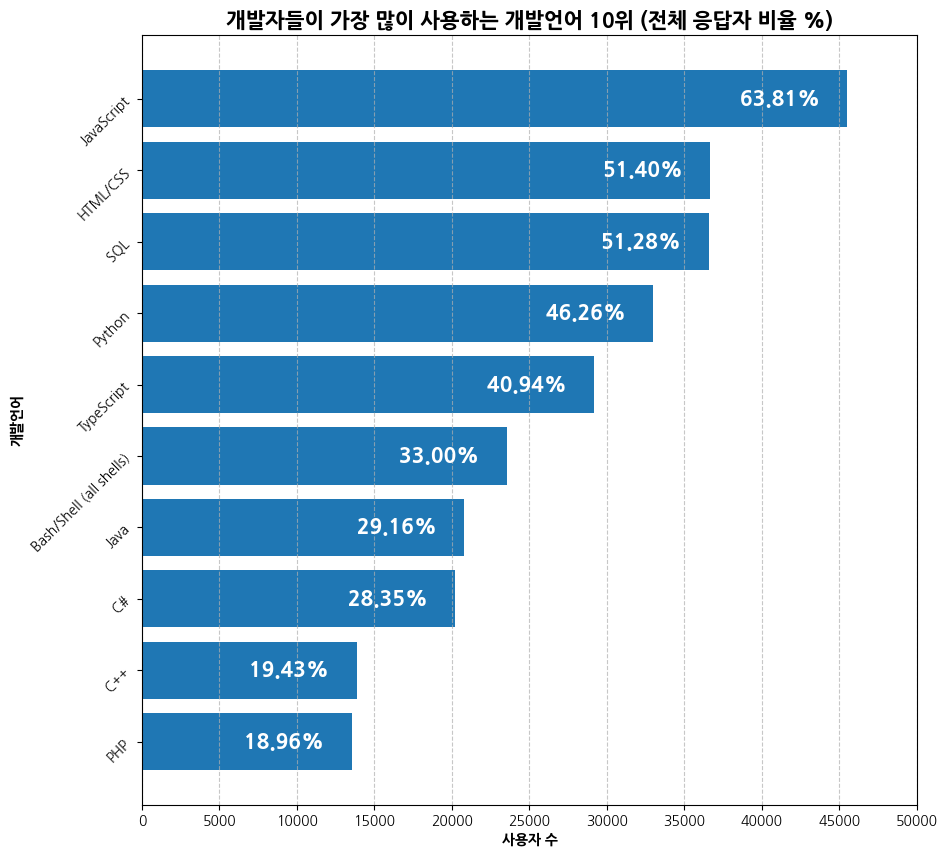

In [261]:
top10_lang = lang_frequency.nlargest(10).sort_values(ascending = True)
total_respondents = lang_df['ResponseId'].nunique()
top10_lang_percentage = (top10_lang / total_respondents) * 100

plt.figure(figsize = standard_figsize)
lang_bars = plt.barh(width = top10_lang.values, y = top10_lang.index)
for bar, percentage in zip(lang_bars, top10_lang_percentage):
    plt.text(x = bar.get_width() - top10_lang.values.max() * 0.1, y = bar.get_y() + bar.get_height() / 2, s = f'{percentage : .2f}%', color = 'white', fontweight = 'bold', fontsize = 15, va = 'center', ha = 'center')
plt.title('개발자들이 가장 많이 사용하는 개발언어 10위 (전체 응답자 비율 %)', fontsize = 15, fontweight = 'bold')
plt.xlabel('사용자 수', fontweight = 'bold')
plt.ylabel('개발언어', fontweight = 'bold')
plt.xticks(np.arange(0, top10_lang.values.max() + 5000, 5000))
plt.yticks(rotation = 45)
plt.grid(axis = 'x', linestyle = '--', alpha = 0.7)
plt.show()

### 사용을 희망하는 언어

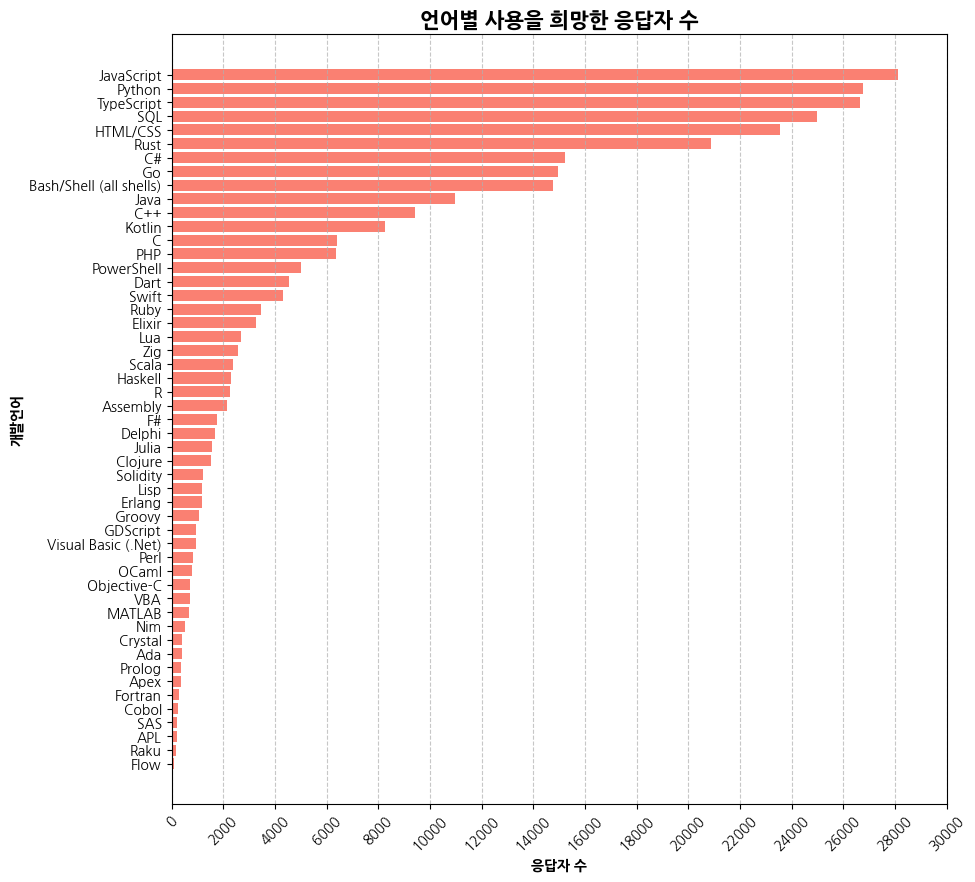

In [262]:
prflang_frequency = prflang_df['LanguageWantToWorkWith'].value_counts(ascending = True)

plt.figure(figsize = standard_figsize)
plt.barh(width = prflang_frequency.values, y = prflang_frequency.index, color = 'salmon')
plt.title('언어별 사용을 희망한 응답자 수', fontsize = 15, fontweight = 'bold')
plt.xlabel('응답자 수', fontweight = 'bold')
plt.ylabel('개발언어', fontweight = 'bold')
plt.xticks(np.arange(0, prflang_frequency.values.max() + 2000, 2000), rotation = 45)
plt.grid(axis = 'x', linestyle = '--', alpha = 0.7)
plt.show()

#### Top 10

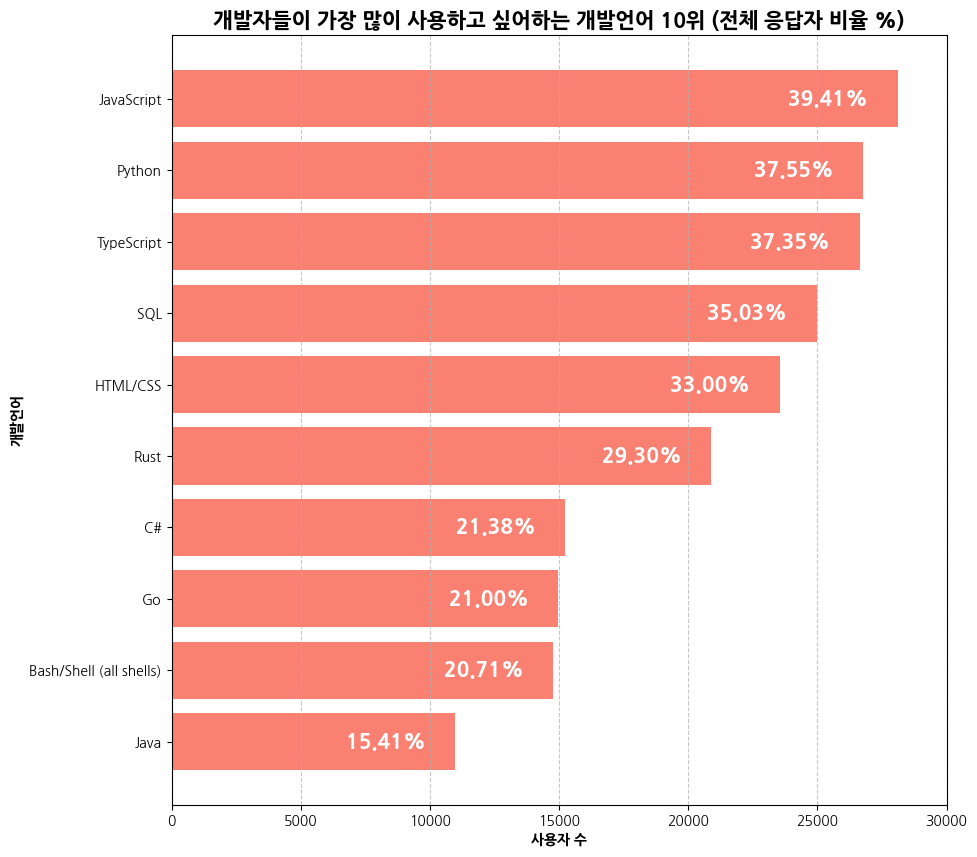

In [263]:
top10_prflang = prflang_frequency.nlargest(10).sort_values(ascending = True)
total_prfrespondents = prflang_df['ResponseId'].nunique()
top10_prflang_percentage = (top10_prflang / total_prfrespondents) * 100

plt.figure(figsize = standard_figsize)
prflang_bars = plt.barh(width = top10_prflang.values, y = top10_prflang.index, color = 'salmon')
plt.title('개발자들이 가장 많이 사용하고 싶어하는 개발언어 10위 (전체 응답자 비율 %)', fontsize = 15, fontweight = 'bold')
plt.xlabel('사용자 수', fontweight = 'bold')
plt.ylabel('개발언어', fontweight = 'bold')
plt.xticks(np.arange(0, top10_prflang.values.max() + 5000, 5000))
for bar, percentage in zip(prflang_bars, top10_prflang_percentage):
    plt.text(bar.get_width() - (top10_prflang.values.max() * 0.1), bar.get_y() + bar.get_height() / 2, f'{percentage : .2f}%', color = 'white', fontsize = 15, fontweight = 'bold', ha = 'center', va = 'center')
plt.grid(axis = 'x', linestyle = '--', alpha = 0.7)
plt.show()

### 언어별 사용자 수 vs 사용 희망자 수

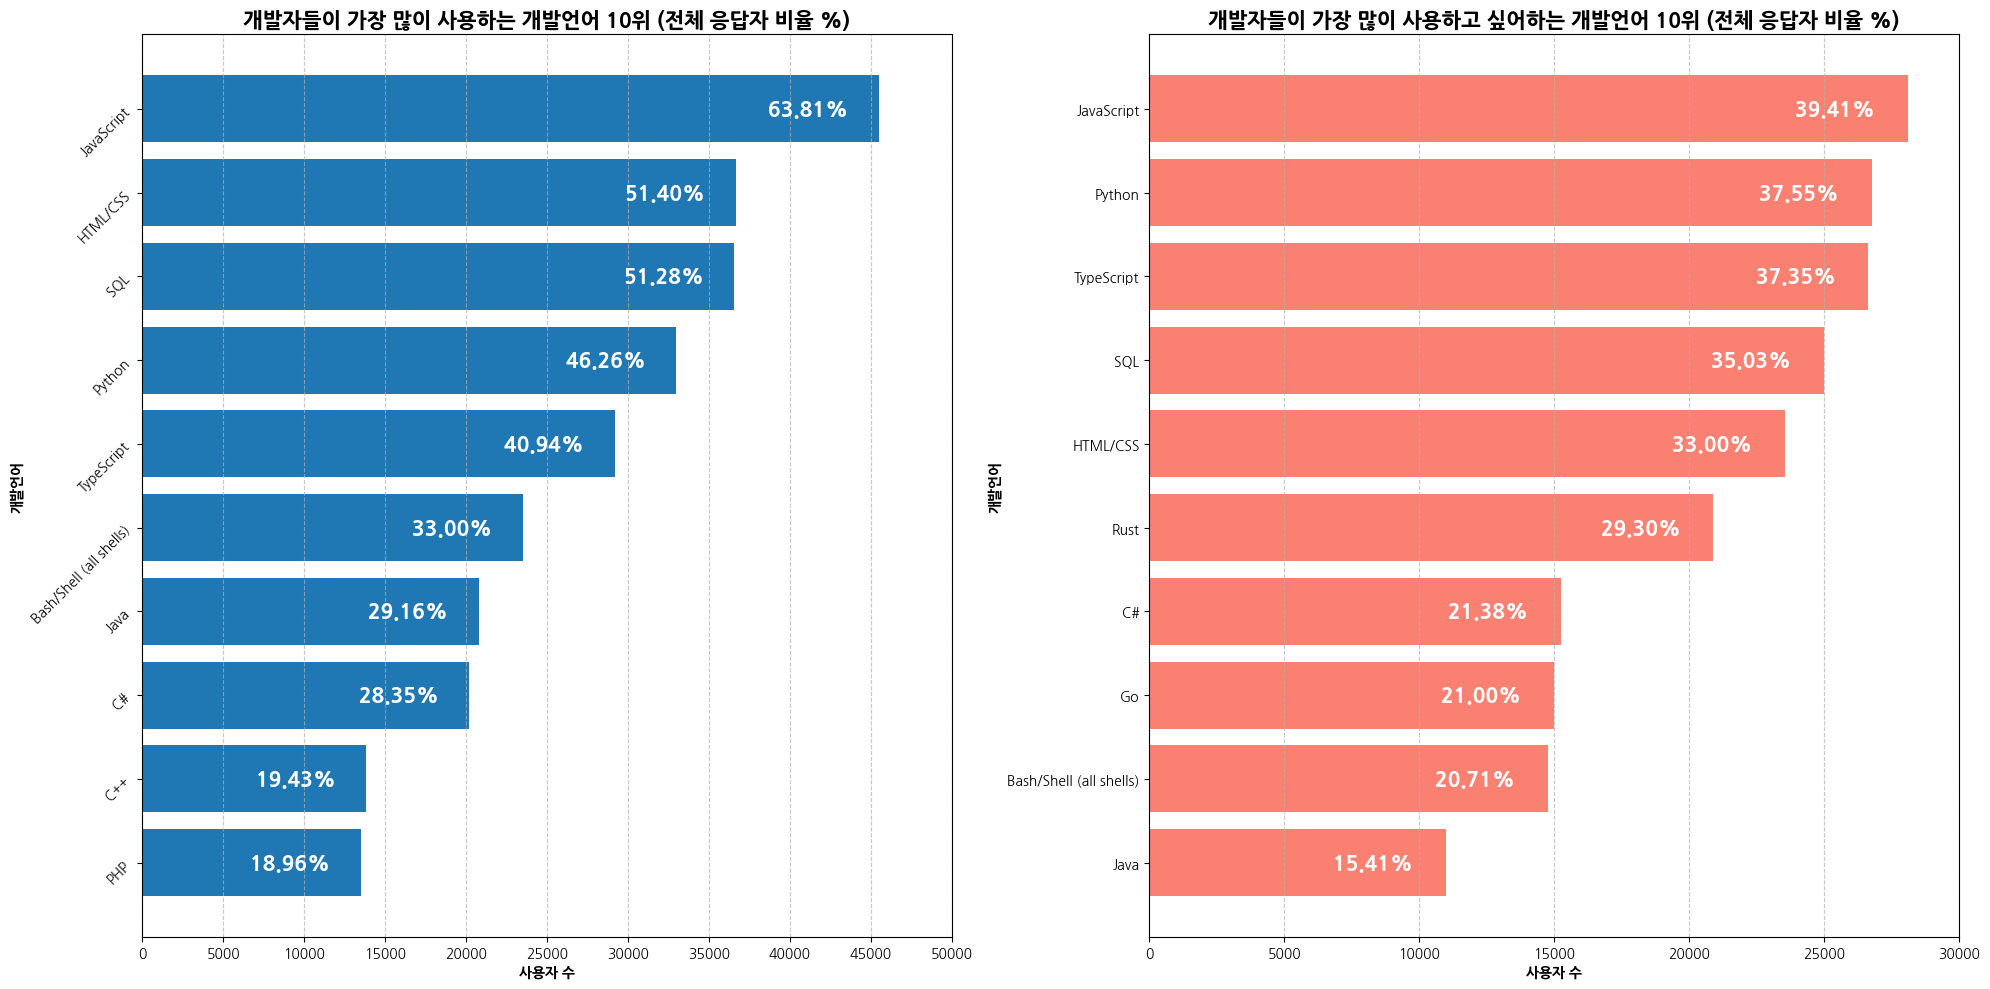

In [264]:
plt.figure(figsize = (20, 10))

# 그래프1 - 현재 사용하는 언어
plt.subplot(1, 2, 1)
lang_bars = plt.barh(width = top10_lang.values, y = top10_lang.index)
for bar, percentage in zip(lang_bars, top10_lang_percentage):
    plt.text(x = bar.get_width() - top10_lang.values.max() * 0.1, y = bar.get_y() + bar.get_height() / 2, s = f'{percentage : .2f}%', color = 'white', fontweight = 'bold', fontsize = 15, va = 'center', ha = 'center')
plt.title('개발자들이 가장 많이 사용하는 개발언어 10위 (전체 응답자 비율 %)', fontsize = 15, fontweight = 'bold')
plt.xlabel('사용자 수', fontweight = 'bold')
plt.ylabel('개발언어', fontweight = 'bold')
plt.xticks(np.arange(0, top10_lang.values.max() + 5000, 5000))
plt.yticks(rotation = 45)
plt.grid(axis = 'x', linestyle = '--', alpha = 0.7)

# 그래프2 - 사용을 희망하는 언어
plt.subplot(1, 2, 2)
prflang_bars = plt.barh(width = top10_prflang.values, y = top10_prflang.index, color = 'salmon')
plt.title('개발자들이 가장 많이 사용하고 싶어하는 개발언어 10위 (전체 응답자 비율 %)', fontsize = 15, fontweight = 'bold')
plt.xlabel('사용자 수', fontweight = 'bold')
plt.ylabel('개발언어', fontweight = 'bold')
plt.xticks(np.arange(0, top10_prflang.values.max() + 5000, 5000))
for bar, percentage in zip(prflang_bars, top10_prflang_percentage):
    plt.text(bar.get_width() - (top10_prflang.values.max() * 0.1), bar.get_y() + bar.get_height() / 2, f'{percentage : .2f}%', color = 'white', fontsize = 15, fontweight = 'bold', ha = 'center', va = 'center')
plt.grid(axis = 'x', linestyle = '--', alpha = 0.7)

plt.tight_layout()
plt.show()

### 언어별 사용자 수 vs 사용 희망자 수 2

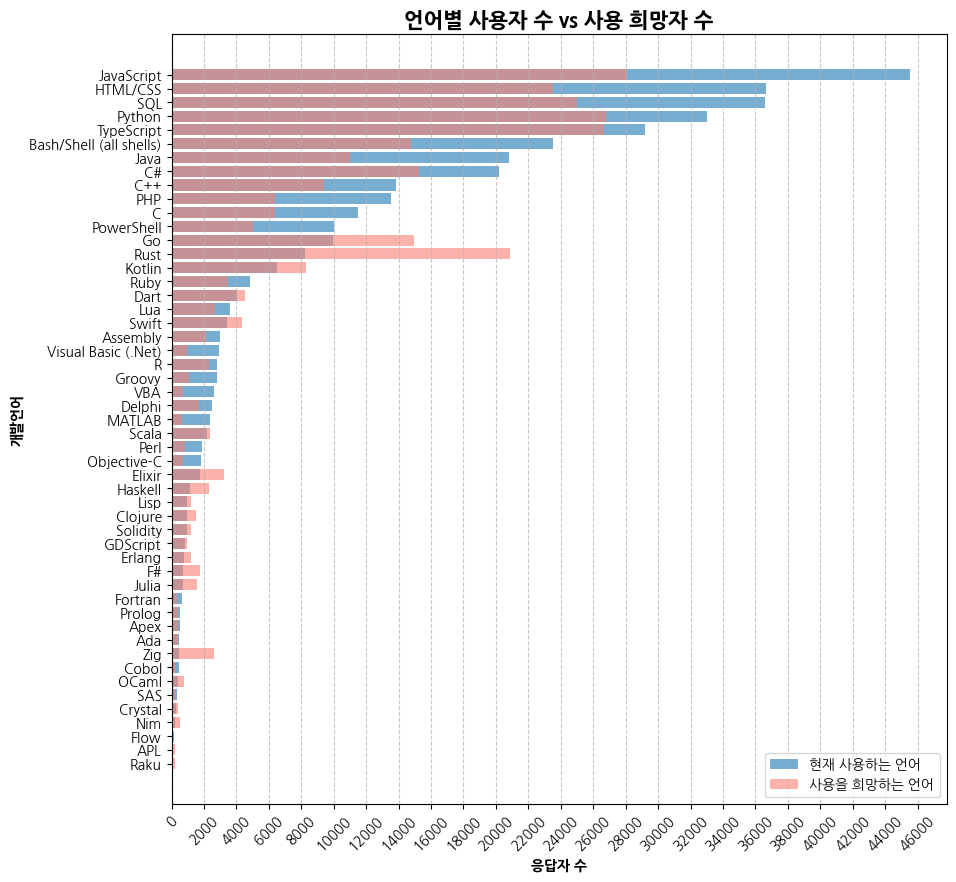

In [265]:
plt.figure(figsize = standard_figsize)

plt.barh(width = lang_frequency.values, y = np.arange(len(lang_frequency)), tick_label = lang_frequency.index, alpha = 0.6)

for idx, lang in enumerate(lang_frequency.index):
    prflang_count = prflang_frequency.loc[lang]
    plt.barh(y = idx, width = prflang_count, color = 'salmon', alpha = 0.6)

plt.title('언어별 사용자 수 vs 사용 희망자 수', fontsize = 15, fontweight = 'bold')
plt.ylabel('개발언어', fontweight = 'bold')
plt.xlabel('응답자 수', fontweight = 'bold')
plt.xticks(np.arange(0, max(lang_frequency.values.max(), prflang_frequency.values.max()) + 2000, 2000), rotation = 45)
plt.grid(axis = 'x', linestyle = '--', alpha = 0.7)
plt.legend(['현재 사용하는 언어', '사용을 희망하는 언어'], loc = 'lower right')
plt.show()

## 데이터 직군

### TOP 10 비교

In [266]:
print(DATA_DEVS)

['Data or business analyst', 'Data scientist or machine learning specialist', 'Engineer, data']


In [267]:
data_lang_df = lang_df[lang_df['DevType'].isin(DATA_DEVS)]
data_prflang_df = prflang_df[prflang_df['DevType'].isin(DATA_DEVS)]

data_lang_frequency = data_lang_df['LanguageHaveWorkedWith'].value_counts(ascending = True)
data_prflang_frequency = data_prflang_df['LanguageWantToWorkWith'].value_counts(ascending = True)

data_top10_lang = data_lang_frequency.nlargest(10).sort_values(ascending = True)
data_top10_prflang = data_prflang_frequency.nlargest(10).sort_values(ascending = True)

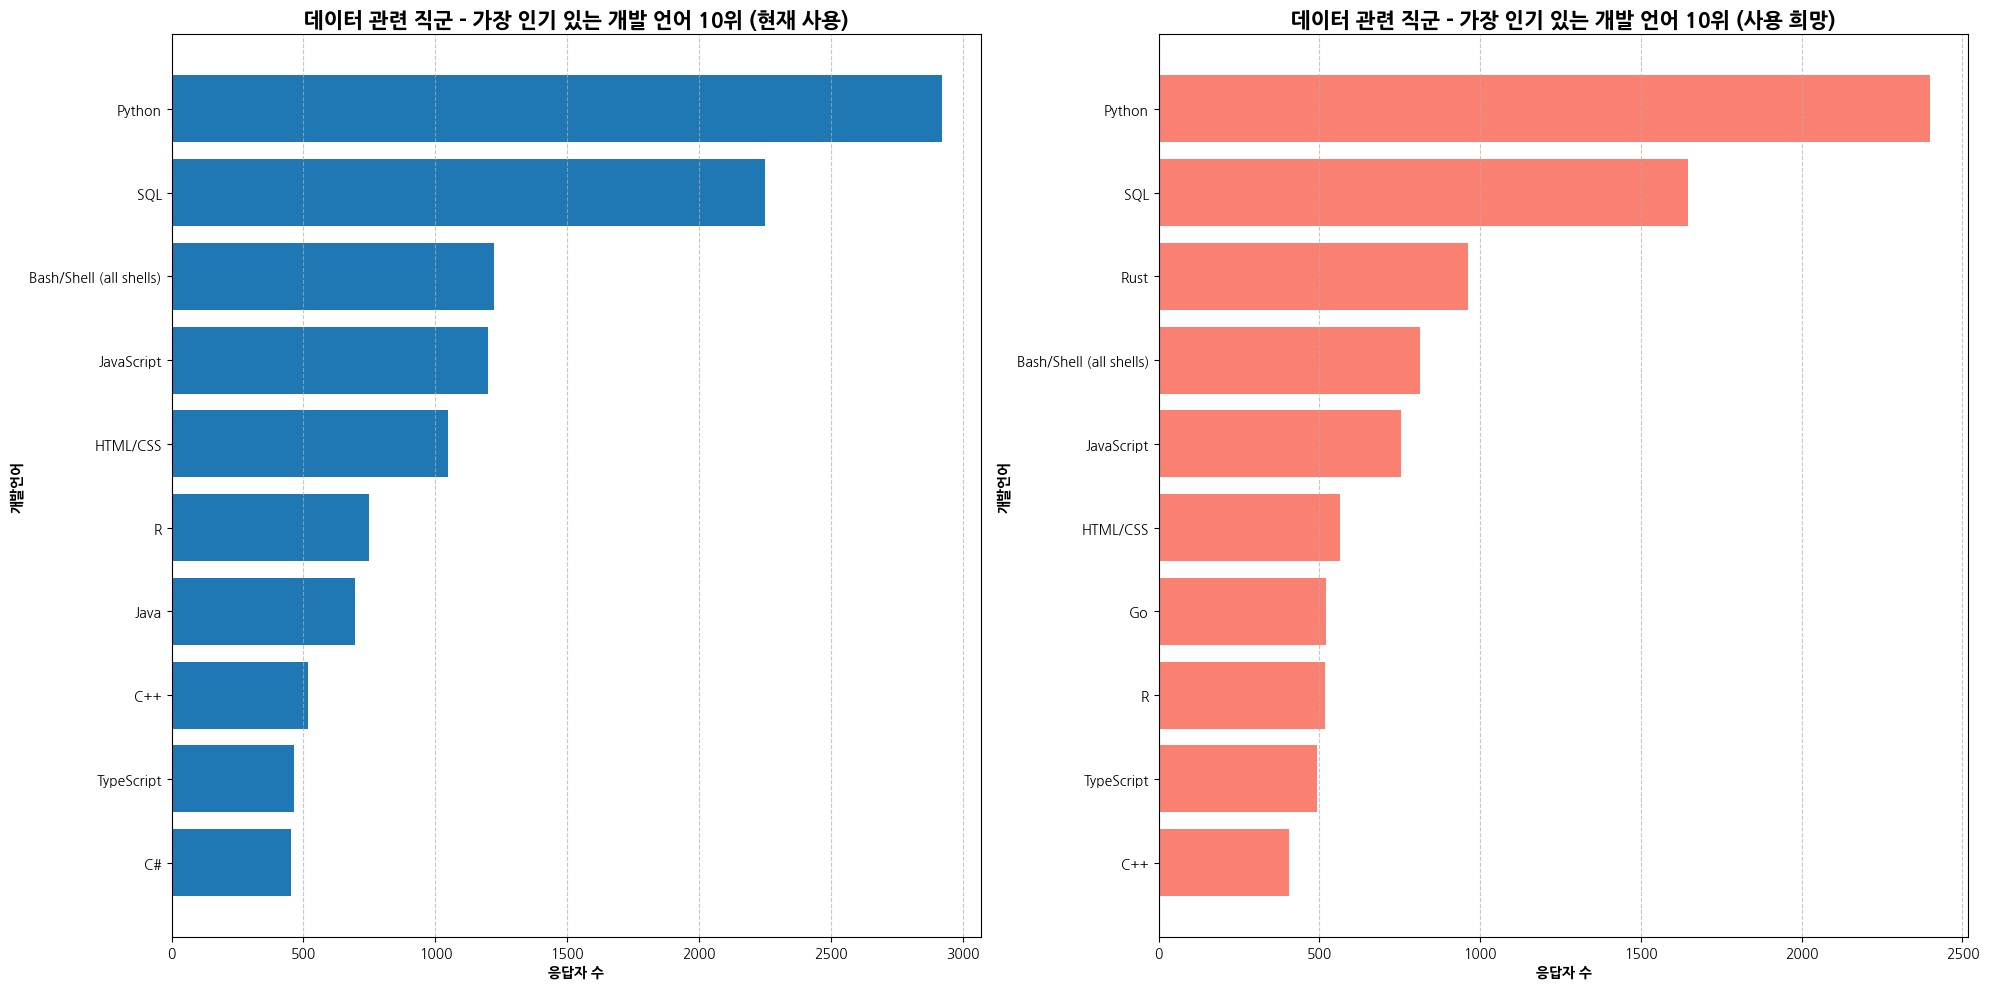

In [268]:
fig, axes = plt.subplots(1, 2, figsize = (20, 10))

axes[0].barh(width = data_top10_lang.values, y = data_top10_lang.index)
axes[0].set_title('데이터 관련 직군 - 가장 인기 있는 개발 언어 10위 (현재 사용)', fontsize = 15, fontweight = 'bold')
axes[0].set_xlabel('응답자 수', fontweight = 'bold')
axes[0].set_ylabel('개발언어', fontweight = 'bold')
axes[0].grid(axis = 'x', linestyle = '--', alpha = 0.7)
                  
axes[1].barh(width = data_top10_prflang.values, y = data_top10_prflang.index, color = 'salmon')
axes[1].set_title('데이터 관련 직군 - 가장 인기 있는 개발 언어 10위 (사용 희망)', fontsize = 15, fontweight = 'bold')
axes[1].set_xlabel('응답자 수', fontweight = 'bold')
axes[1].set_ylabel('개발언어', fontweight = 'bold')
axes[1].grid(axis = 'x', linestyle = '--', alpha = 0.7)

plt.tight_layout()
plt.show()

### 데이터 직군별 상세 비교

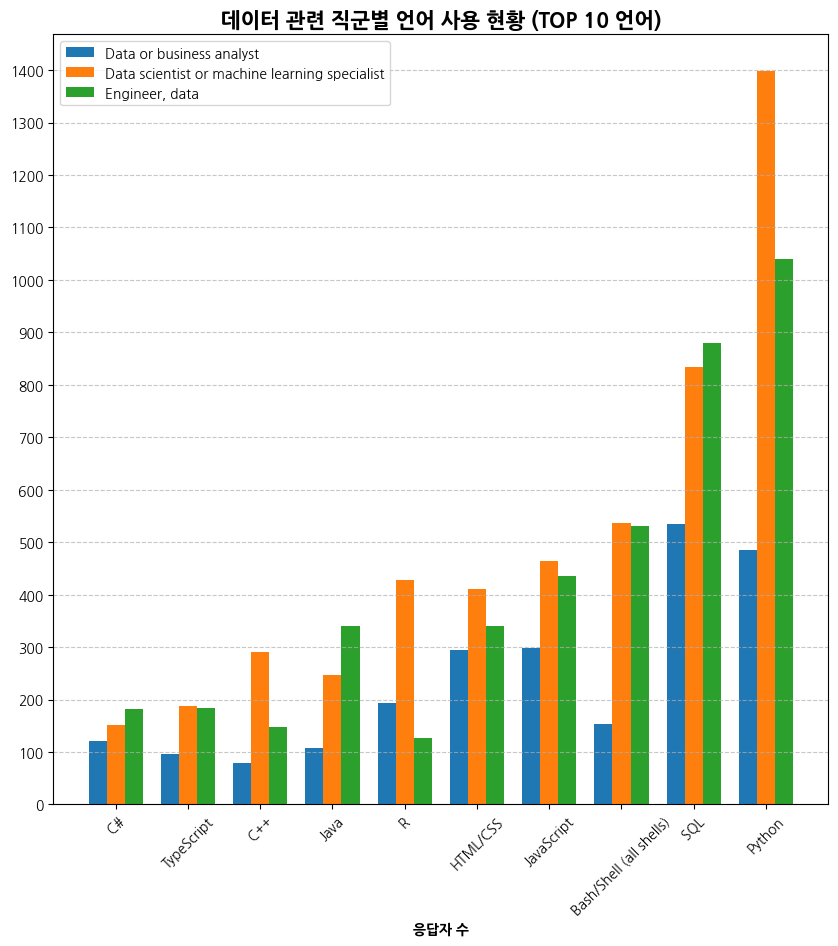

In [269]:
plt.figure(figsize = standard_figsize)
x_indices = np.arange(len(data_top10_lang.index))
bar_width = 0.25
for idx, dev_type in enumerate(DATA_DEVS):
    # 해당 직군 = dev_type 데이터를 필터링
    filtered_data_lang_df = data_lang_df[data_lang_df['DevType'] == dev_type]
    # 필터링된 데이터의 언어 사용빈도 계산
    data_lang_frequency = filtered_data_lang_df['LanguageHaveWorkedWith'].value_counts()
    # 상위 10개 언어에 대한 빈도만 선택
    data_lang_frequency_top10 = data_lang_frequency[data_lang_frequency.index.isin(data_top10_lang.index)]
    values = [data_lang_frequency_top10[lang] for lang in data_top10_lang.index]
    # 해당 직군의 막대를 그림
    plt.bar(height = values, x =x_indices + idx * bar_width, width = bar_width, label = dev_type)
plt.xticks(x_indices + bar_width, data_top10_lang.index, rotation = 45)
plt.yticks(np.arange(0, data_lang_frequency.values.max() + 400, 100))
plt.xlabel('개발언어', fontweight = 'bold')
plt.xlabel('응답자 수', fontweight = 'bold')
plt.title('데이터 관련 직군별 언어 사용 현황 (TOP 10 언어)', fontsize = 15, fontweight = 'bold')
plt.legend()
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
plt.show()

## 언어별 주요 직군

In [270]:
filtered_df = lang_df[(lang_df['DevType'] != 'Developer, full-stack') & (lang_df['DevType'] != 'Developer, back-end')]
grouped_df = filtered_df.groupby(['LanguageHaveWorkedWith', 'DevType'])['ResponseId'].count().reset_index(name = 'Count')
grouped_df_sorted = grouped_df.sort_values(['LanguageHaveWorkedWith', 'Count'], ascending = [True, False])
top3_devtypes_by_lang = grouped_df_sorted.groupby('LanguageHaveWorkedWith').head(3)
top3_devtypes_by_lang_sorted = top3_devtypes_by_lang.sort_values(['LanguageHaveWorkedWith', 'Count'], ascending = [False, True]).reset_index(drop = True)
total_count_by_lang = grouped_df.groupby('LanguageHaveWorkedWith')['Count'].sum().reset_index(name = 'TotalCount')
top3_devtypes_by_lang_with_total = pd.merge(top3_devtypes_by_lang_sorted, total_count_by_lang, on = 'LanguageHaveWorkedWith')
top3_devtypes_by_lang_with_total['Percentage'] = (top3_devtypes_by_lang_sorted_with_total['Count'] / top3_devtypes_by_lang_sorted_with_total['TotalCount']) * 100
top3_devtypes_by_lang_with_total

,LanguageHaveWorkedWith,DevType,Count,TotalCount,Percentage
0,Zig,"Developer, game or graphics",24,255,5.85683
1,Zig,"Developer, desktop or enterprise applications",26,255,17.35358
2,Zig,"Developer, embedded applications or devices",27,255,27.33189
3,Visual Basic (.Net),"Developer, front-end",77,1332,10.89788
4,Visual Basic (.Net),Other (please specify):,128,1332,12.02879
...,...,...,...,...,...
148,Ada,"Developer, desktop or enterprise applications",48,329,11.65254
149,Ada,"Developer, embedded applications or devices",52,329,18.64407
150,APL,Academic researcher,8,82,7.33945
151,APL,"Senior Executive (C-Suite, VP, etc.)",8,82,8.25688


In [271]:
y_positions = []
current_language = None
for idx, row in top3_devtypes_by_lang_sorted.iterrows():
    if current_language != row['LanguageHaveWorkedWith']:
        current_language = row['LanguageHaveWorkedWith']
        y_positions.append((current_language, idx + 2))
y_labels, y_ticks = zip(*y_positions)

In [272]:
unique_devtypes = top3_devtypes_by_lang['DevType'].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_devtypes)))
color_map = {devtype : color for devtype, color in zip(unique_devtypes, colors)}

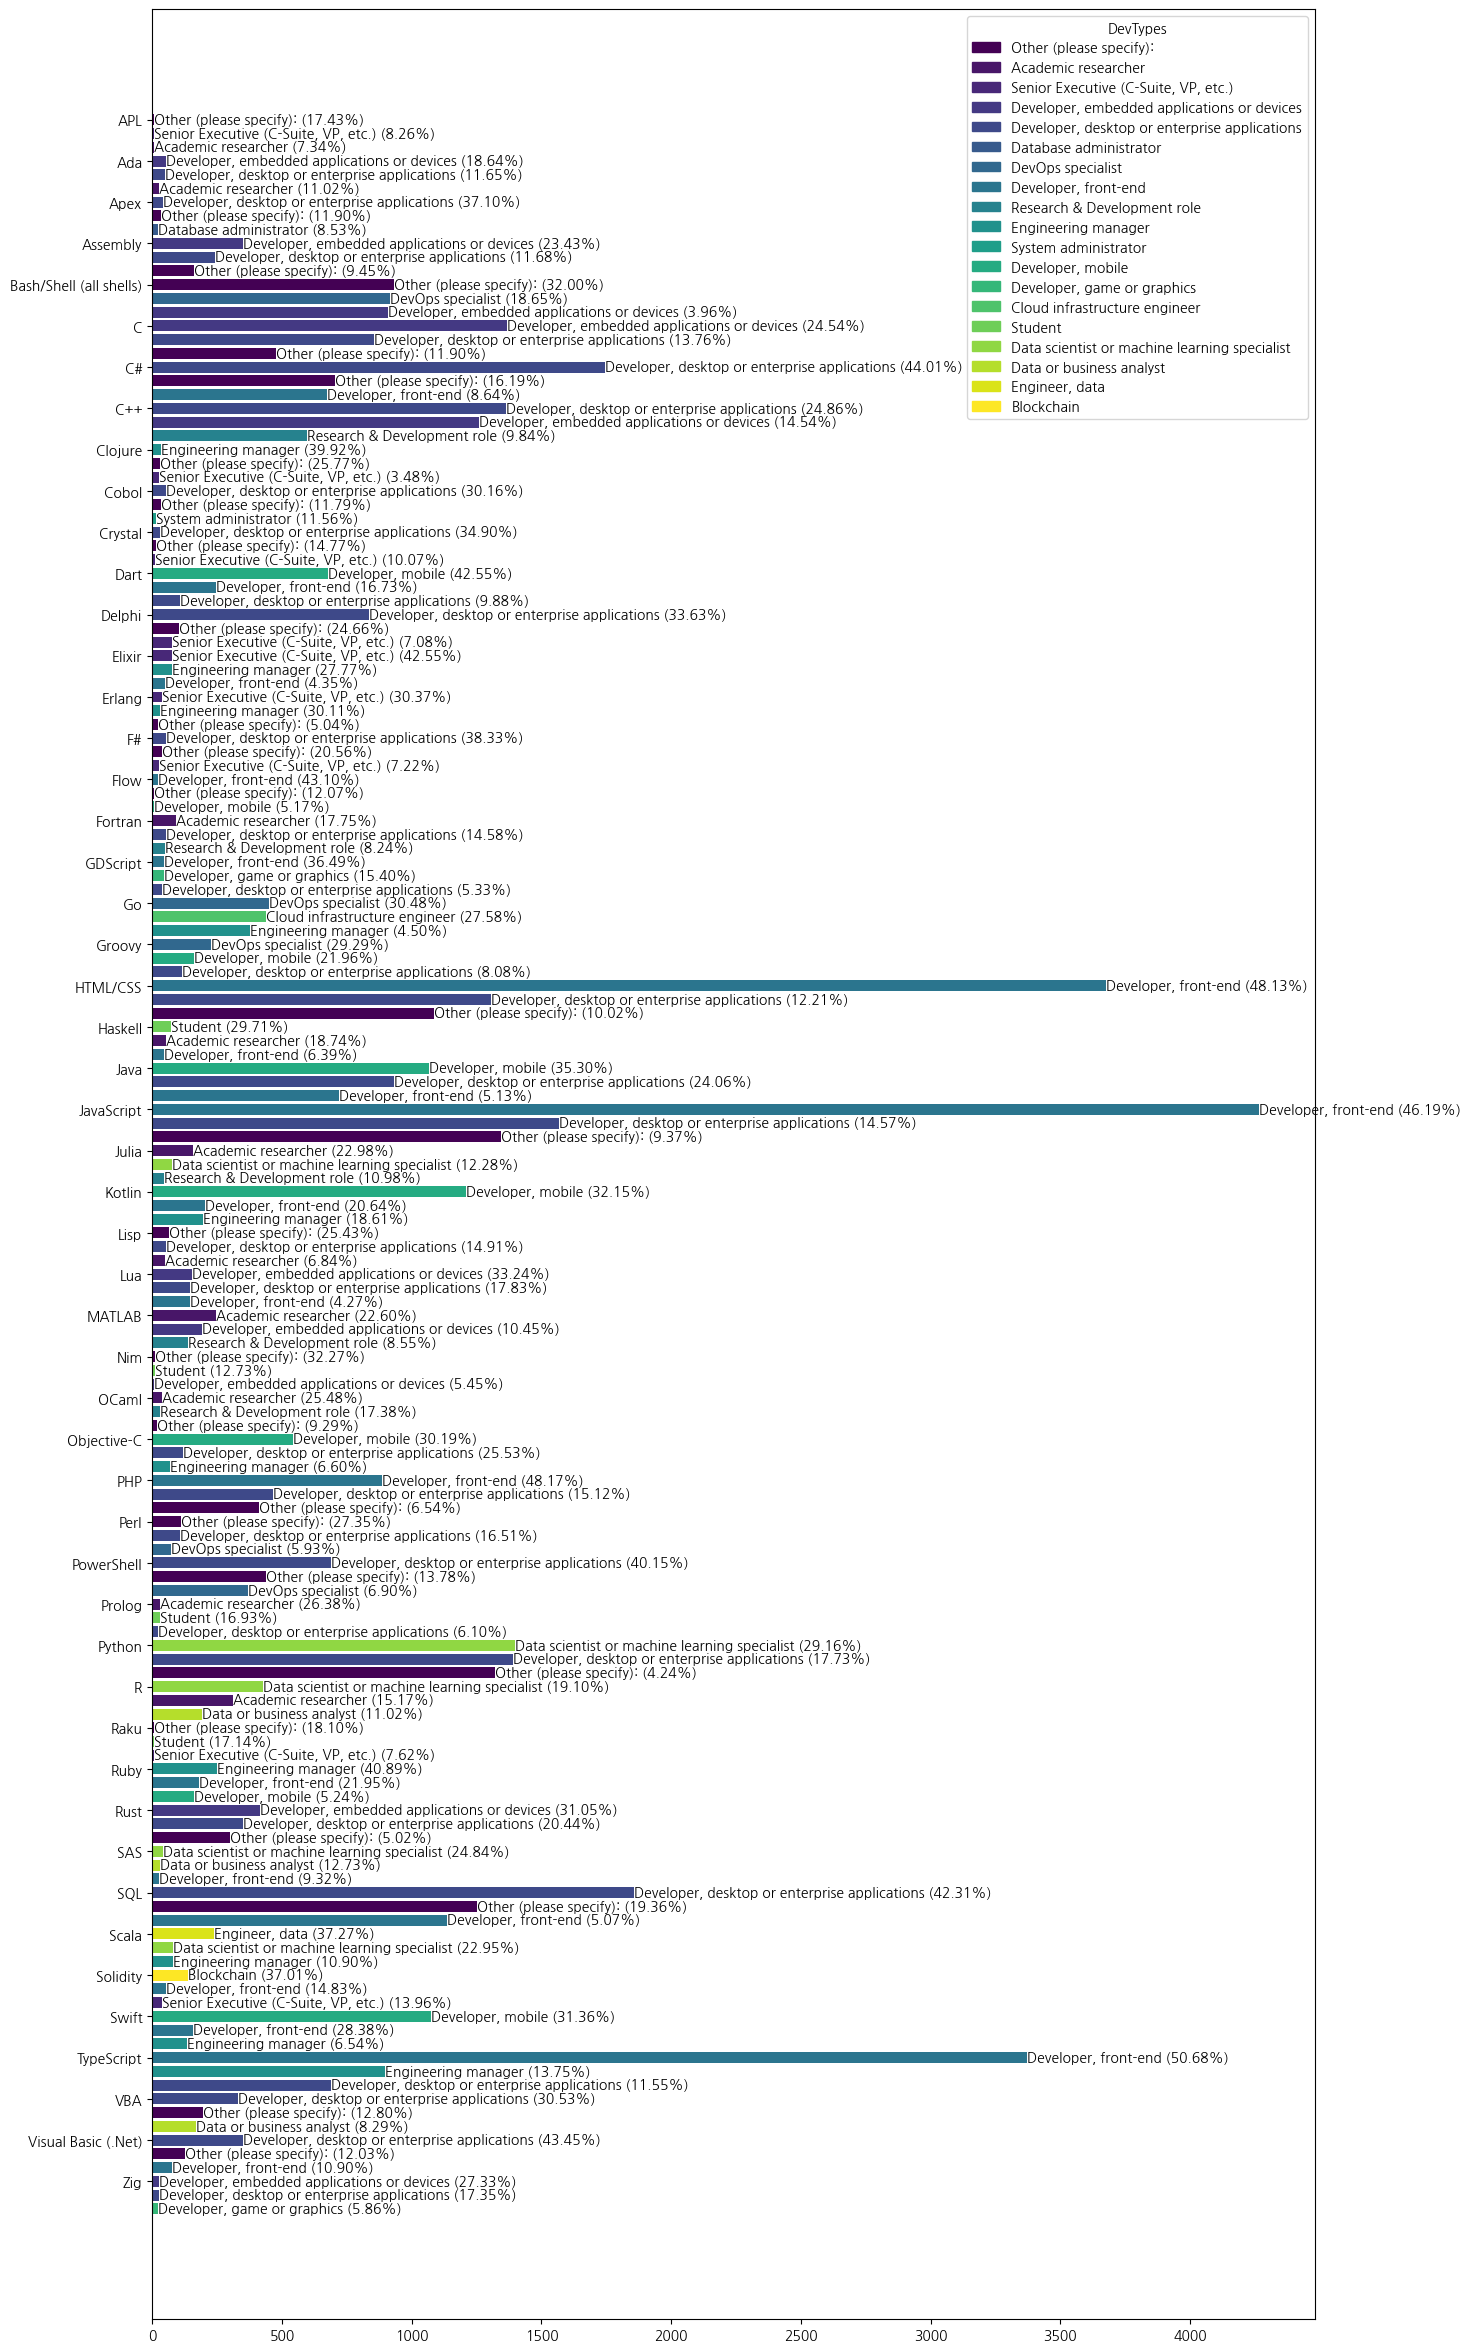

In [273]:
plt.figure(figsize = (15, 30))
top3_dev_bars = plt.barh(y = top3_devtypes_by_lang_sorted.index, width = top3_devtypes_by_lang_sorted['Count'], color = [color_map.get(devtype) for devtype in top3_devtypes_by_lang_sorted['DevType']])
plt.yticks(y_ticks, y_labels)

for bar, (devtype, percentage) in zip(top3_dev_bars, top3_devtypes_by_lang_with_total[['DevType', 'Percentage']].values):
    plt.text(x = bar.get_width(), y = bar.get_y() + bar.get_height() / 2, s = f'{devtype} ({percentage:.2f}%)', va = 'center', ha = 'left', fontsize = 10)
plt.legend([plt.Rectangle(xy = (0, 0), width = 1, height = 1, color = color_map[devtype]) for devtype in unique_devtypes], unique_devtypes, title = 'DevTypes', loc = 'upper right')
plt.show()

In [274]:
lang_df['DevType'].value_counts(normalize = True)

DevType
Developer, full-stack                           0.38463
Developer, back-end                             0.16470
Developer, front-end                            0.05285
Developer, desktop or enterprise applications   0.04798
Other (please specify):                         0.03466
Developer, mobile                               0.02854
Engineering manager                             0.02843
Developer, embedded applications or devices     0.02532
Senior Executive (C-Suite, VP, etc.)            0.02085
DevOps specialist                               0.02062
Research & Development role                     0.01891
Data scientist or machine learning specialist   0.01757
Academic researcher                             0.01736
Engineer, data                                  0.01537
Student                                         0.01478
Cloud infrastructure engineer                   0.01467
Developer, game or graphics                     0.00957
System administrator                    

## 언어별 연봉

### 전체 연봉 분포

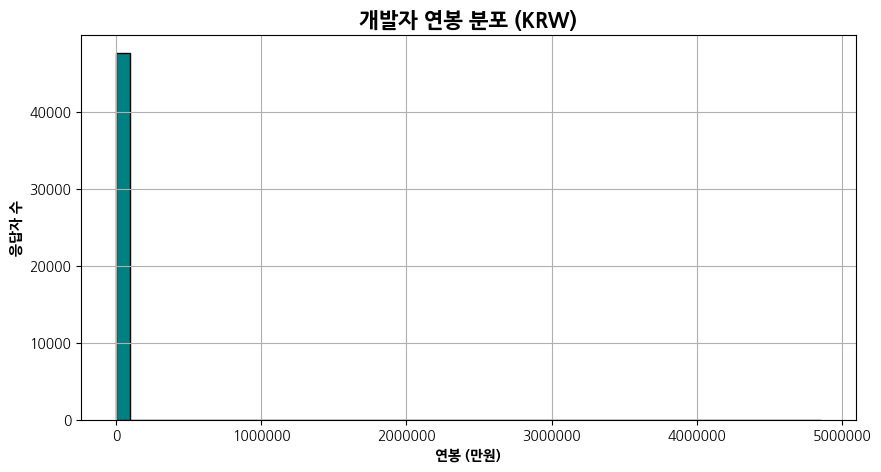

In [275]:
plt.figure(figsize = (10, 5))
plt.hist(comp_sr, bins = 50, color = 'teal', edgecolor = 'black')
plt.ticklabel_format(style = 'plain', axis = 'x')
plt.title('개발자 연봉 분포 (KRW)', fontsize = 15, fontweight = 'bold')
plt.xlabel('연봉 (만원)', fontweight = 'bold')
plt.ylabel('응답자 수', fontweight = 'bold')
plt.grid(True)
plt.show()

In [276]:
log_comp_sr = np.log1p(comp_sr)

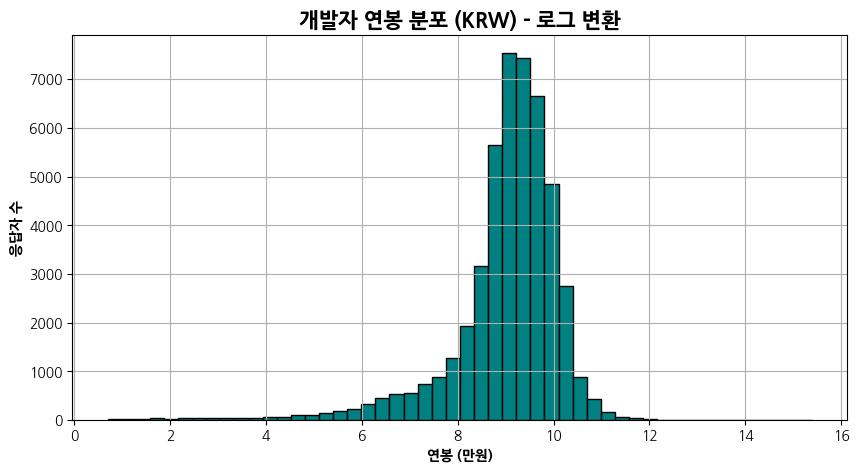

In [277]:
plt.figure(figsize = (10, 5))
plt.hist(log_comp_sr, bins = 50, color = 'teal', edgecolor = 'black')
plt.ticklabel_format(style = 'plain', axis = 'x')
plt.title('개발자 연봉 분포 (KRW) - 로그 변환', fontsize = 15, fontweight = 'bold')
plt.xlabel('연봉 (만원)', fontweight = 'bold')
plt.ylabel('응답자 수', fontweight = 'bold')
plt.grid(True)
plt.show()

### 언어별 연봉 중간값

In [278]:
merged_df = pd.merge(lang_df, comp_df[['ResponseId', 'CompTotalKrw(만원)']], on = 'ResponseId', how = 'inner')
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245144 entries, 0 to 245143
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ResponseId              245144 non-null  int64  
 1   MainBranch              245144 non-null  object 
 2   Age                     245144 non-null  object 
 3   Employment              245144 non-null  object 
 4   RemoteWork              245144 non-null  object 
 5   EdLevel                 245144 non-null  object 
 6   YearsCodePro            244344 non-null  float64
 7   DevType                 245144 non-null  object 
 8   Country                 245144 non-null  object 
 9   Currency                245144 non-null  object 
 10  CompTotal               245144 non-null  float64
 11  LanguageHaveWorkedWith  245015 non-null  object 
 12  LanguageWantToWorkWith  228241 non-null  object 
 13  WorkExp                 169656 non-null  float64
 14  Industry            

In [279]:
median_salary_by_lang = merged_df.groupby('LanguageHaveWorkedWith')[COMP_KRW].median().sort_values(ascending = True).reset_index()

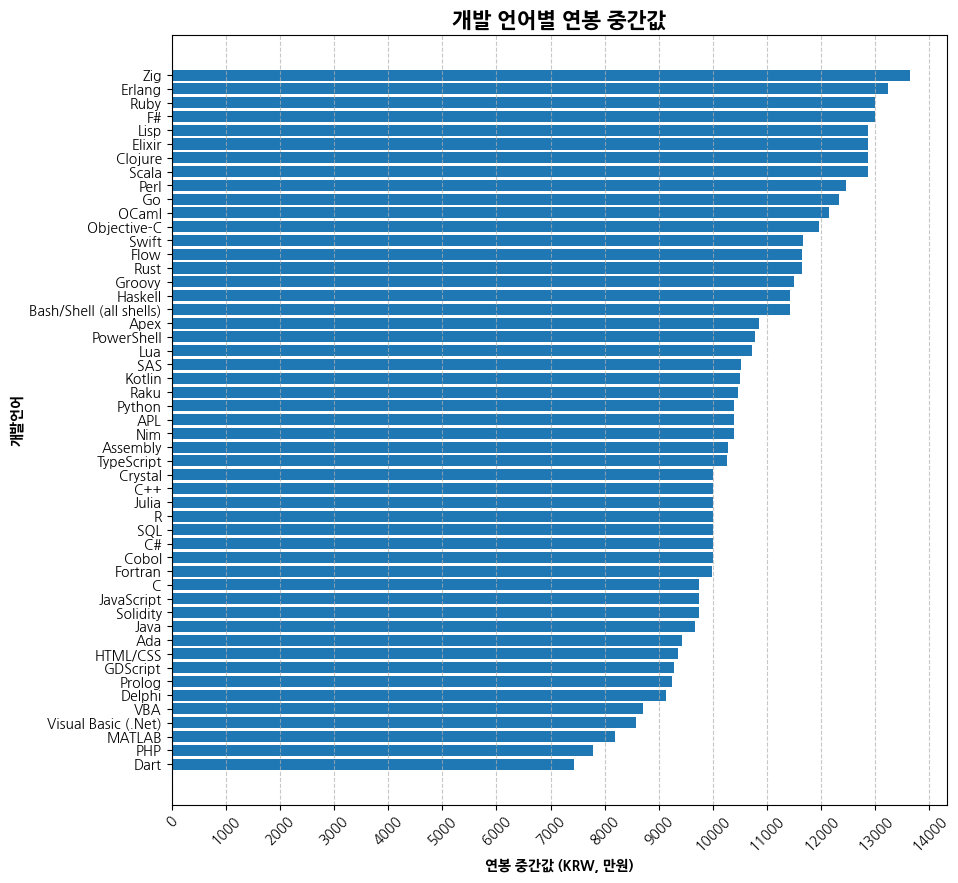

In [280]:
draw_median_salary_barh(df = median_salary_by_lang, target = 'LanguageHaveWorkedWith', title = '개발 언어별 연봉 중간값', ylabel = '개발언어')

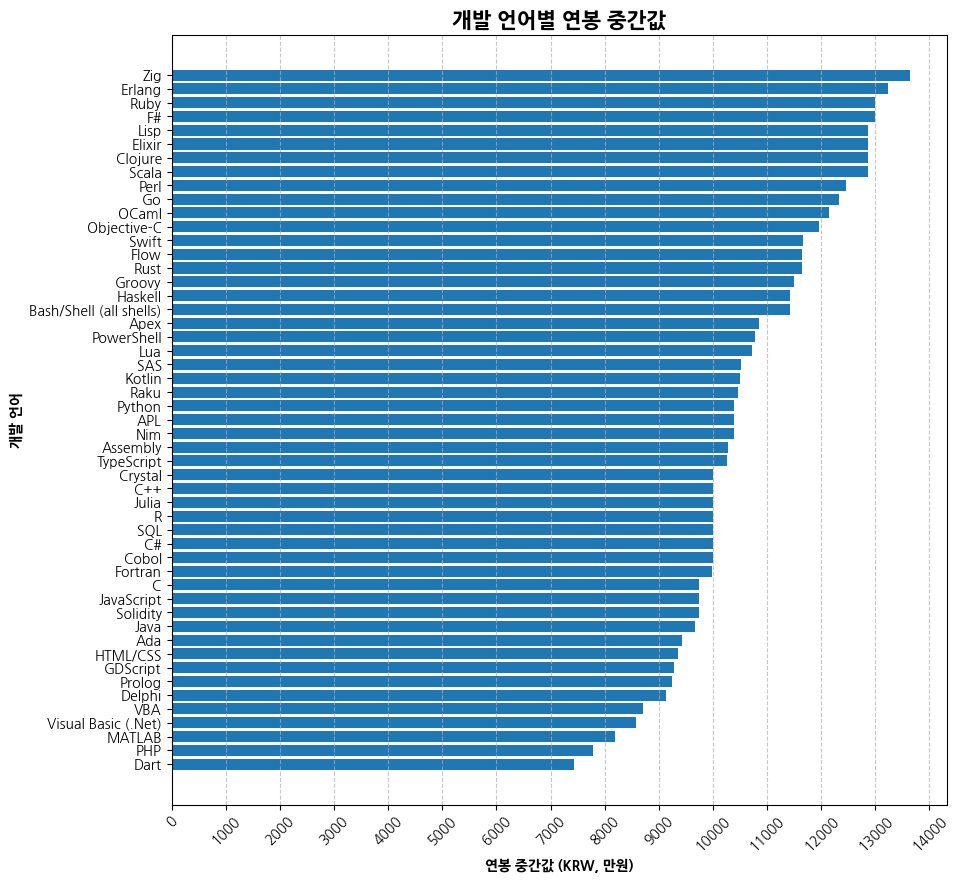

In [281]:
plt.figure(figsize = standard_figsize)
plt.barh(y = median_salary_by_lang['LanguageHaveWorkedWith'], width = median_salary_by_lang[COMP_KRW])
plt.xlabel('연봉 중간값 (KRW, 만원)', fontweight = 'bold')
plt.ylabel('개발 언어', fontweight = 'bold')
plt.title('개발 언어별 연봉 중간값', fontsize = 15, fontweight = 'bold')
plt.xticks(np.arange(0, median_salary_by_lang[COMP_KRW].values.max() + 1000, 1000), rotation = 45)
plt.grid(axis = 'x', linestyle = '--', alpha = 0.7)
plt.show()

### 언어별 연봉 분포

In [282]:
unique_langs = merged_df['LanguageHaveWorkedWith'].dropna().unique()

C:\Users\laura\AppData\Local\Temp\ipykernel_19436\347399450.py:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot([df[df[target] == value][COMP_KRW] for value in label_values], vert = False, showfliers = showfliers, showmeans = True, meanline = True, labels = label_values, patch_artist = True, boxprops = {'facecolor' : 'teal'})


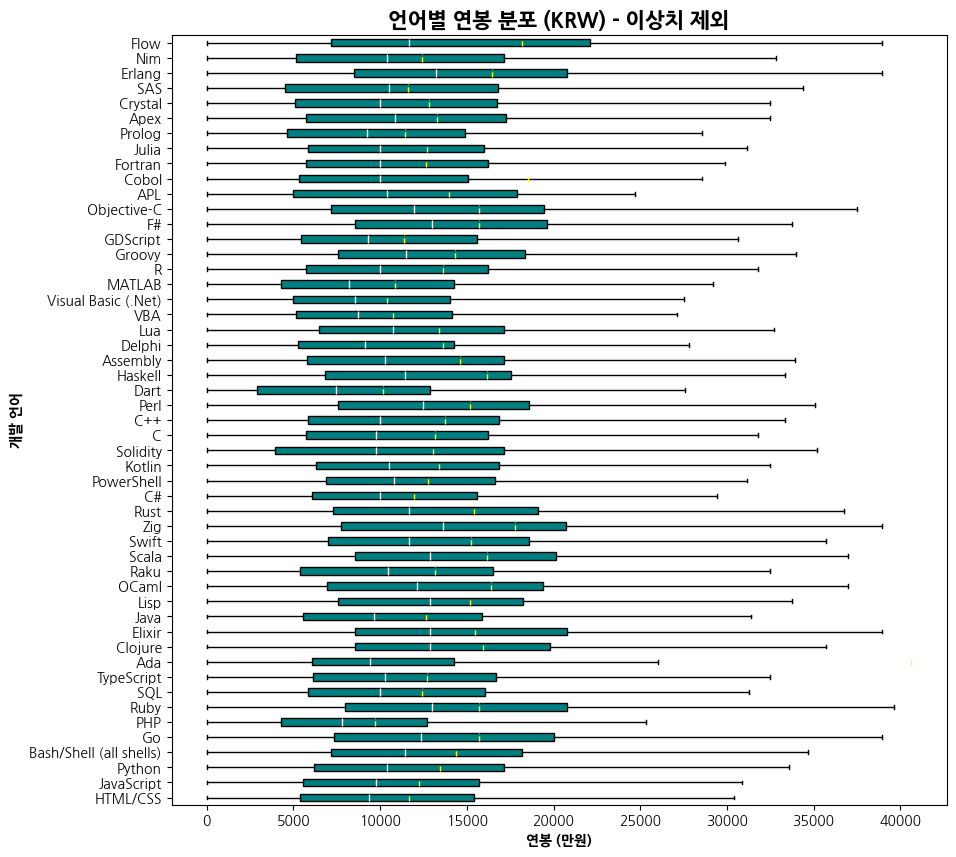

In [283]:
draw_salary_boxplot(df = merged_df, target = 'LanguageHaveWorkedWith', title = '언어별 연봉 분포 (KRW) - 이상치 제외', ylabel = '개발 언어')

C:\Users\laura\AppData\Local\Temp\ipykernel_19436\92343661.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot([merged_df[merged_df['LanguageHaveWorkedWith'] == lang][COMP_KRW] for lang in unique_langs], vert = False, showfliers = False, showmeans = True, meanline = True, labels = unique_langs, patch_artist = True, boxprops = {'facecolor' : 'teal'})


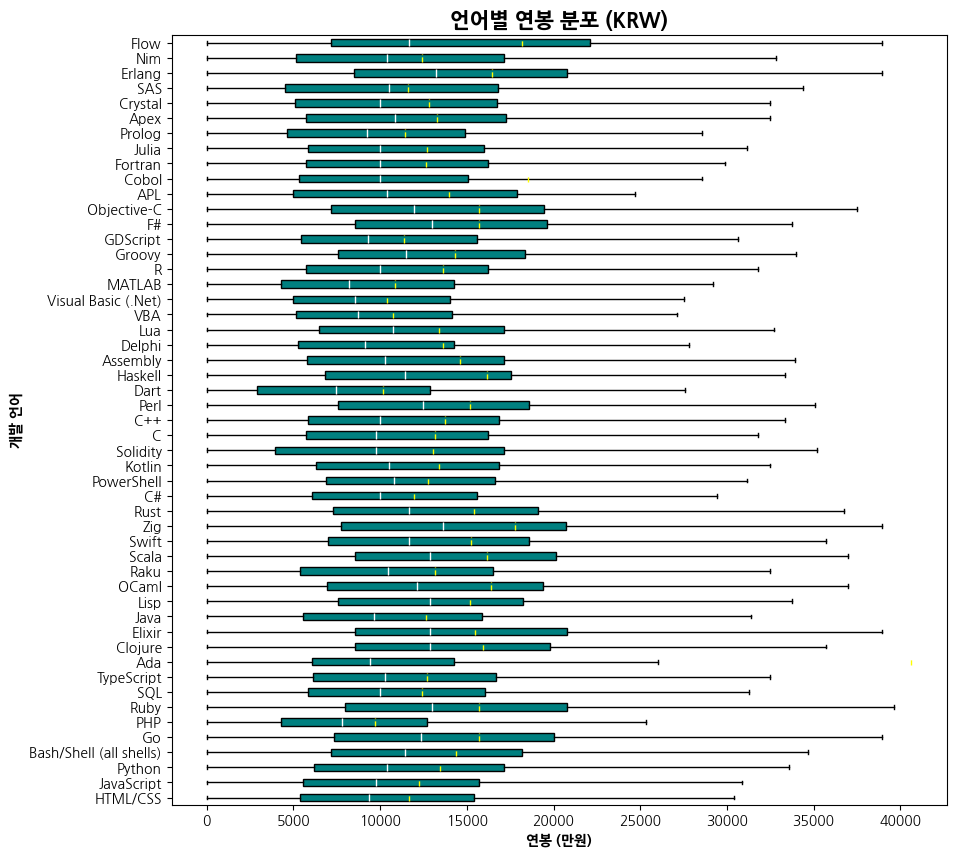

In [284]:
plt.figure(figsize = standard_figsize)
box = plt.boxplot([merged_df[merged_df['LanguageHaveWorkedWith'] == lang][COMP_KRW] for lang in unique_langs], vert = False, showfliers = False, showmeans = True, meanline = True, labels = unique_langs, patch_artist = True, boxprops = {'facecolor' : 'teal'})
plt.setp(box['medians'], color = 'white')
plt.setp(box['means'], color = 'yellow', linewidth = 1)
plt.title('언어별 연봉 분포 (KRW)', fontsize = 15, fontweight = 'bold')
plt.xlabel('연봉 (만원)', fontweight = 'bold')
plt.ylabel('개발 언어', fontweight = 'bold')
plt.ticklabel_format(style = 'plain', axis = 'x')
plt.show()

## 직군별 연봉

### 직군별 연봉 중간값

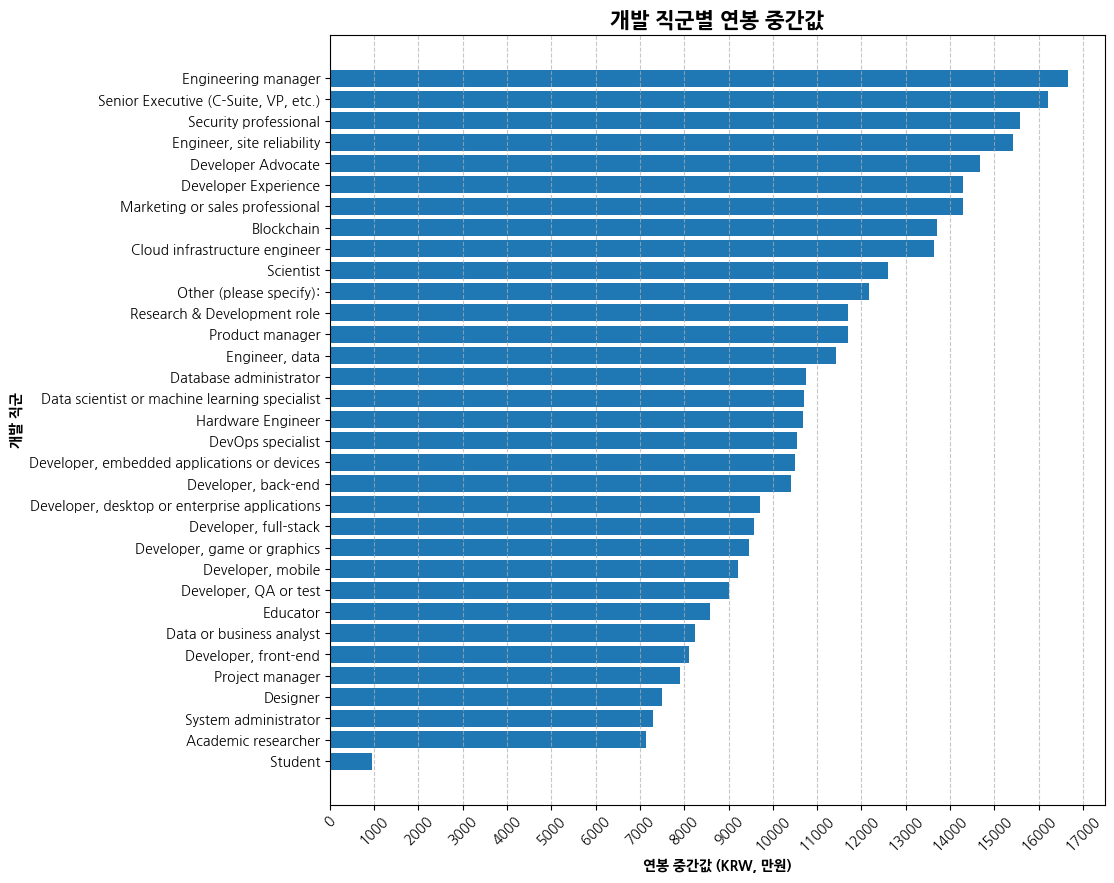

In [285]:
median_salary_by_devtype = merged_df.groupby('DevType')[COMP_KRW].median().sort_values(ascending = True).reset_index()
draw_median_salary_barh(df = median_salary_by_devtype, target = 'DevType', title = '개발 직군별 연봉 중간값', ylabel = '개발 직군')

### 직군별 연봉 분포

C:\Users\laura\AppData\Local\Temp\ipykernel_19436\347399450.py:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot([df[df[target] == value][COMP_KRW] for value in label_values], vert = False, showfliers = showfliers, showmeans = True, meanline = True, labels = label_values, patch_artist = True, boxprops = {'facecolor' : 'teal'})


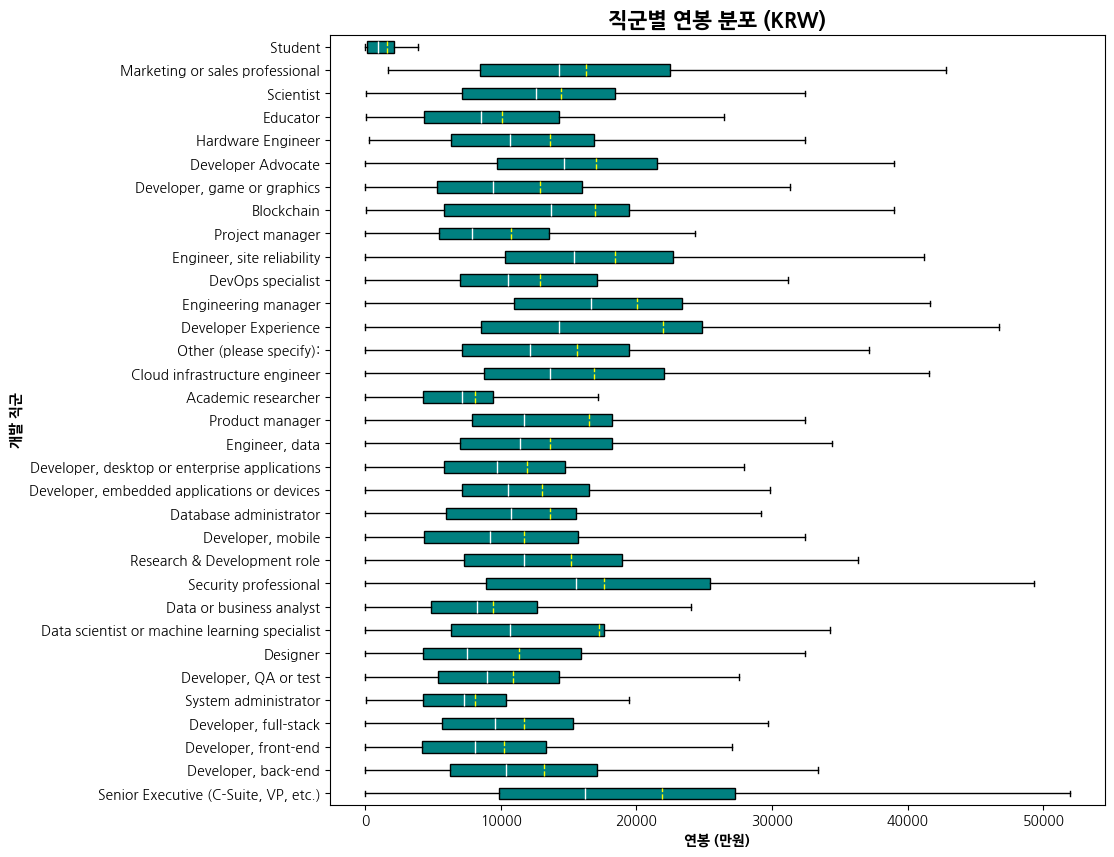

In [286]:
draw_salary_boxplot(df = merged_df, target = 'DevType', title = '직군별 연봉 분포 (KRW)', ylabel = '개발 직군', showfliers = False)